In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_11_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period      s1a     s1x     s1i  \
datetime                                                                     
2013-03-11 00:10:00  2013-03-11  00:10:00     600  7.65221  8.3453  6.5093   
2013-03-11 00:20:00  2013-03-11  00:20:00     600  7.59254  8.3453  6.1880   
2013-03-11 00:30:00  2013-03-11  00:30:00     600  7.87253  8.8961  6.5552   
2013-03-11 00:40:00  2013-03-11  00:40:00     600  7.60631  8.3912  6.7388   
2013-03-11 00:50:00  2013-03-11  00:50:00     600  7.12895  8.2535  6.0962   

                         s1s      s2a     s2x     s2i  ...  tii  vxa  vxx  \
datetime                                               ...                  
2013-03-11 00:10:00  0.35343  7.54564  8.2984  5.9575  ...   47  125  125   
2013-03-11 00:20:00  0.36720  7.45843  8.1607  6.0952  ...   47  125  125   
2013-03-11 00:30:00  0.37638  7.75219  8.8492  6.6919  ...   47  125  125   
2013-03-11 00:40:00  0.30753  7.48597  8.3902  6.6919  ...   47  125  125   
2013-03-11 00:50:00  0.37179  7.00402  8.1148  5.8198  ...   47  125  125   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-11 00:10:00  125   83   83   83   83   83   83  
2013-03-11 00:20:00  125   83   83   83   83   83   83  
2013-03-11 00:30:00  125   83   83   83   83   83   83  
2013-03-11 00:40:00  125   83   83   83   83   83   83  
2013-03-11 00:50:00  125   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       5.953942
std        1.234098
min        2.695010
25%        5.043942
50%        6.167345
75%        6.808797
max        8.845610
Name: s1a, dtype: float64


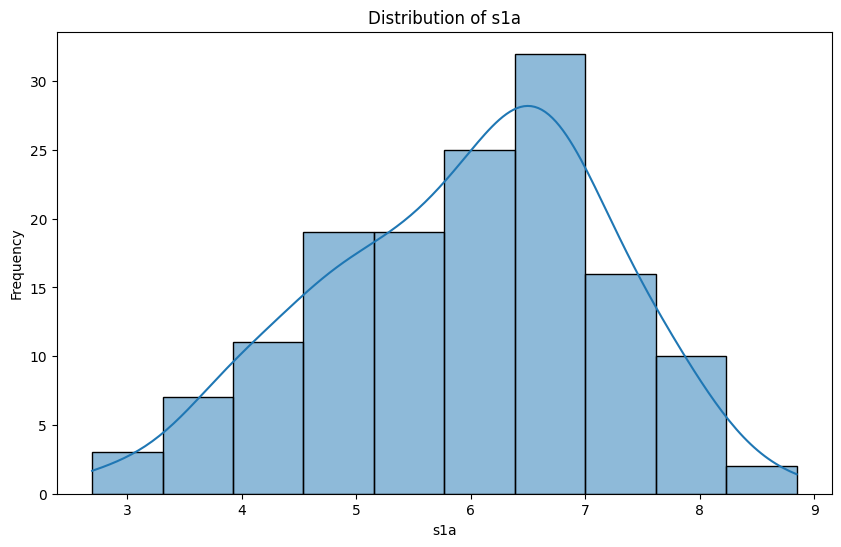


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       7.080500
std        1.474964
min        3.434000
25%        5.809325
50%        7.381400
75%        8.219075
max       10.043600
Name: s1x, dtype: float64


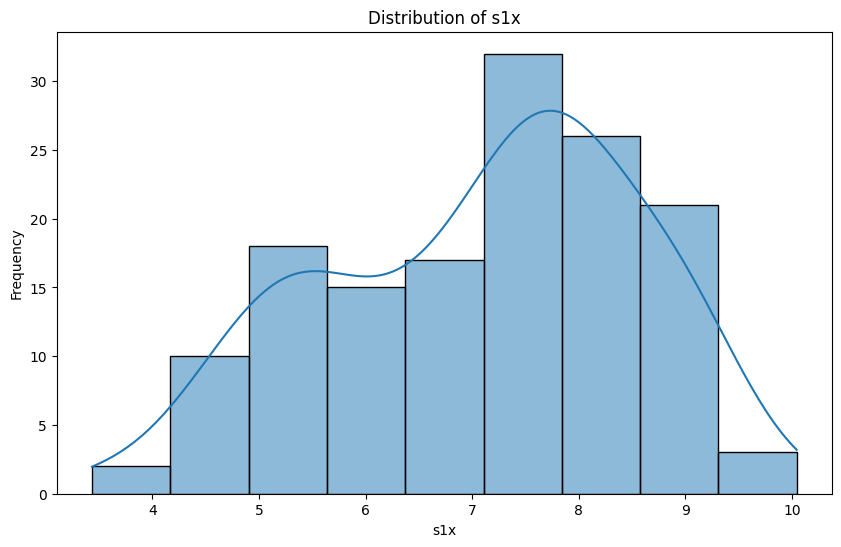


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       4.698481
std        1.086868
min        1.643900
25%        3.984800
50%        4.719200
75%        5.327375
max        7.565000
Name: s1i, dtype: float64


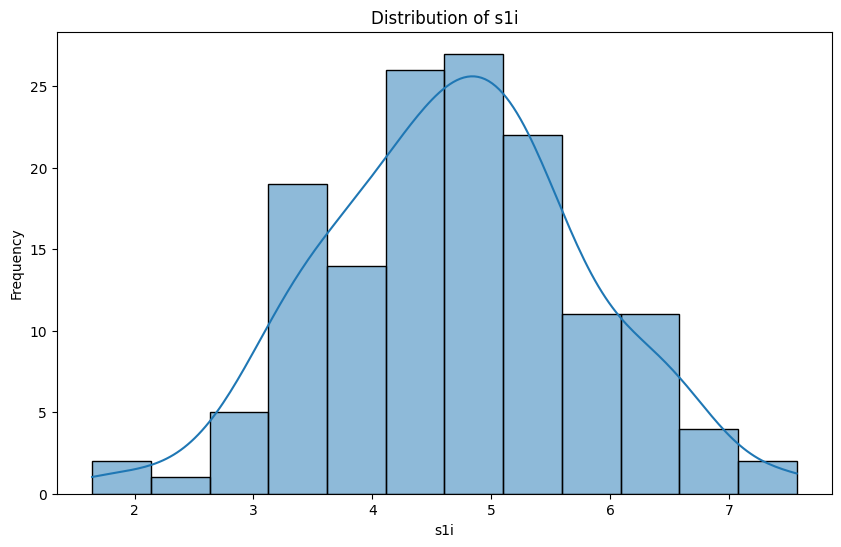


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.445931
std        0.175021
min        0.151470
25%        0.306383
50%        0.433755
75%        0.585225
max        0.872100
Name: s1s, dtype: float64


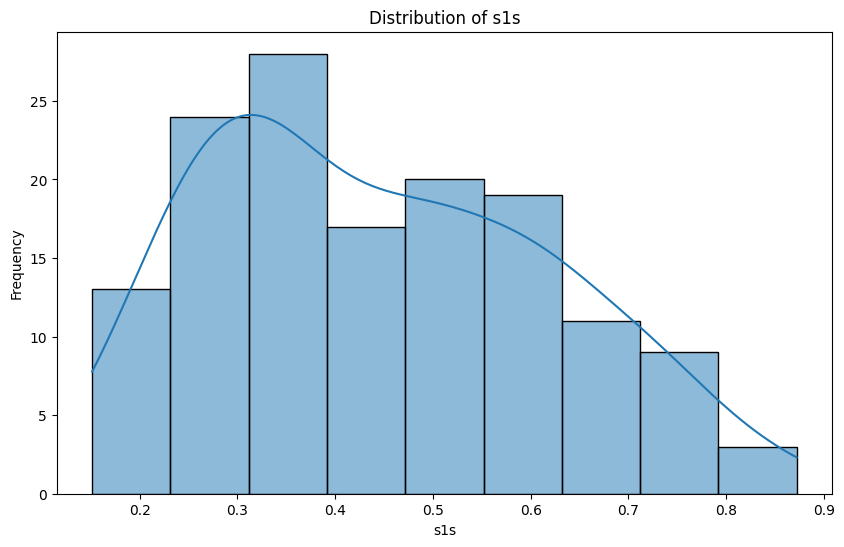


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       5.793822
std        1.369067
min        2.354350
25%        4.735413
50%        6.081430
75%        6.787142
max        8.803300
Name: s2a, dtype: float64


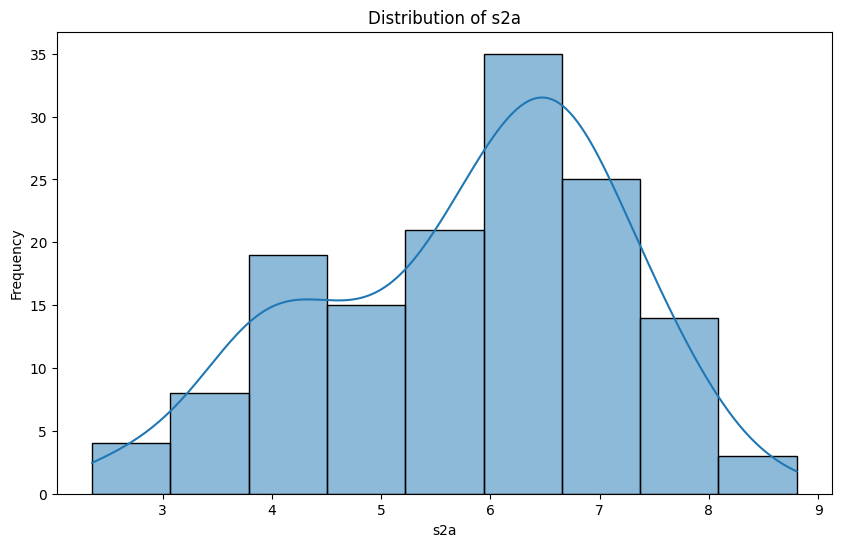


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       7.001088
std        1.492906
min        3.157600
25%        5.728000
50%        7.311550
75%        8.114800
max        9.859000
Name: s2x, dtype: float64


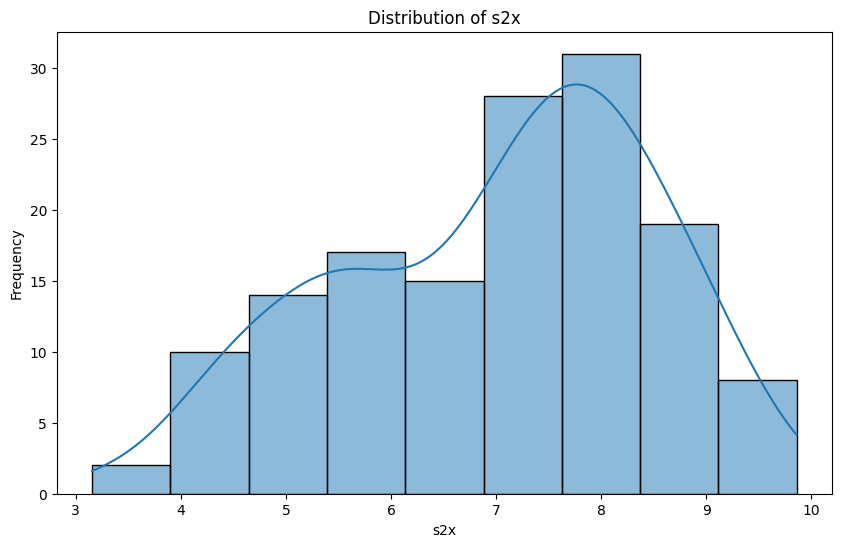


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       4.432600
std        1.278862
min        1.229800
25%        3.455950
50%        4.626400
75%        5.269000
max        7.380400
Name: s2i, dtype: float64


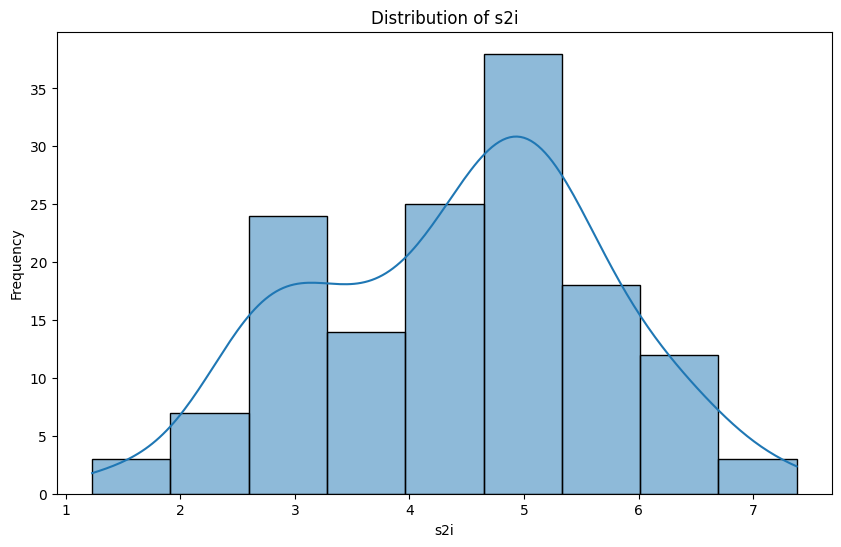


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.490269
std        0.180410
min        0.160650
25%        0.333923
50%        0.486540
75%        0.616208
max        0.982260
Name: s2s, dtype: float64


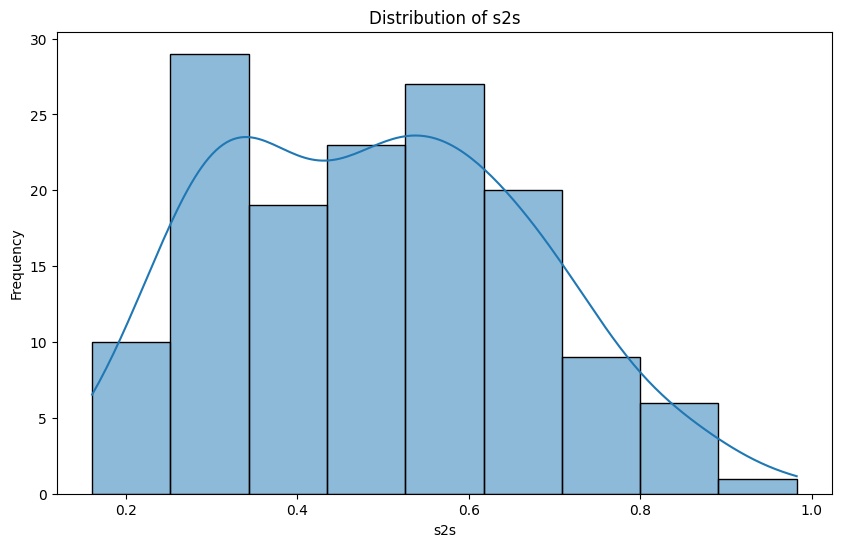


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       5.492985
std        1.242822
min        2.328430
25%        4.697617
50%        5.631075
75%        6.414305
max        8.296120
Name: s3a, dtype: float64


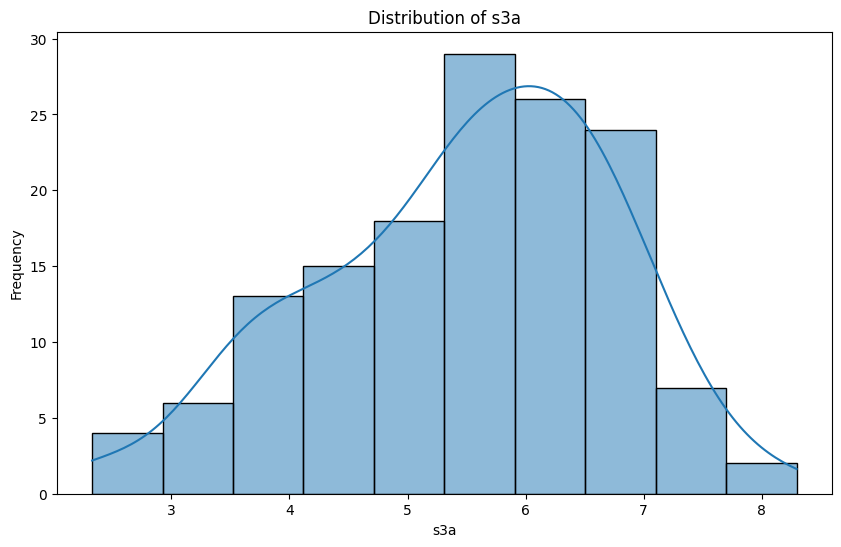


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       6.742274
std        1.433496
min        3.112810
25%        5.681530
50%        6.851215
75%        7.768615
max        9.488740
Name: s3x, dtype: float64


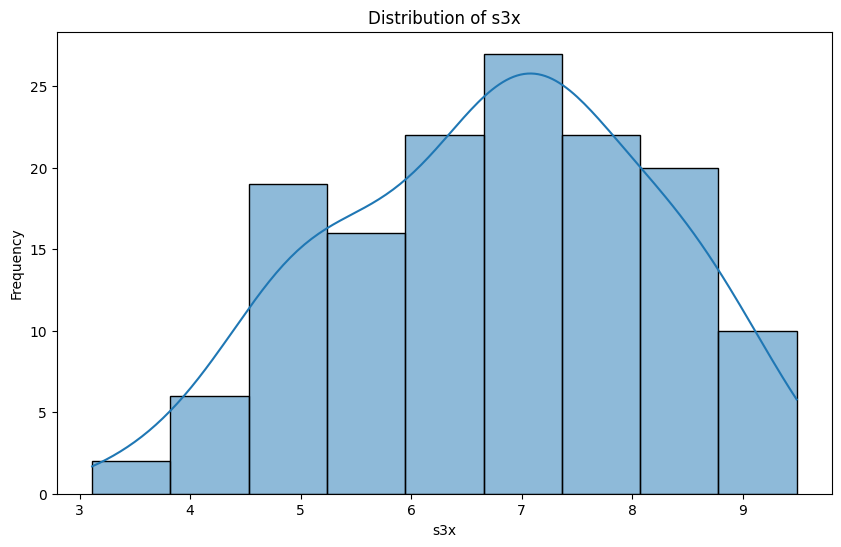


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       4.157627
std        1.111447
min        1.186270
25%        3.330692
50%        4.374235
75%        4.901740
max        6.920020
Name: s3i, dtype: float64


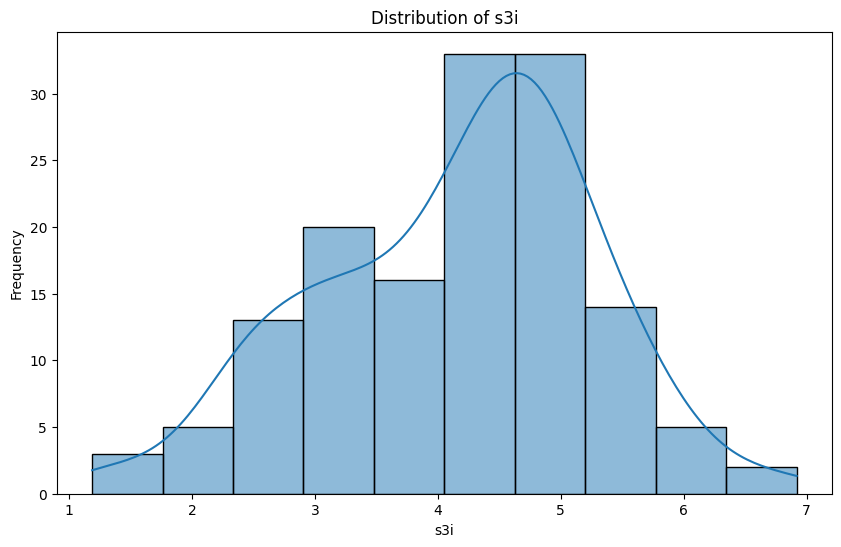


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.495364
std        0.176636
min        0.151370
25%        0.354347
50%        0.504570
75%        0.615807
max        0.926570
Name: s3s, dtype: float64


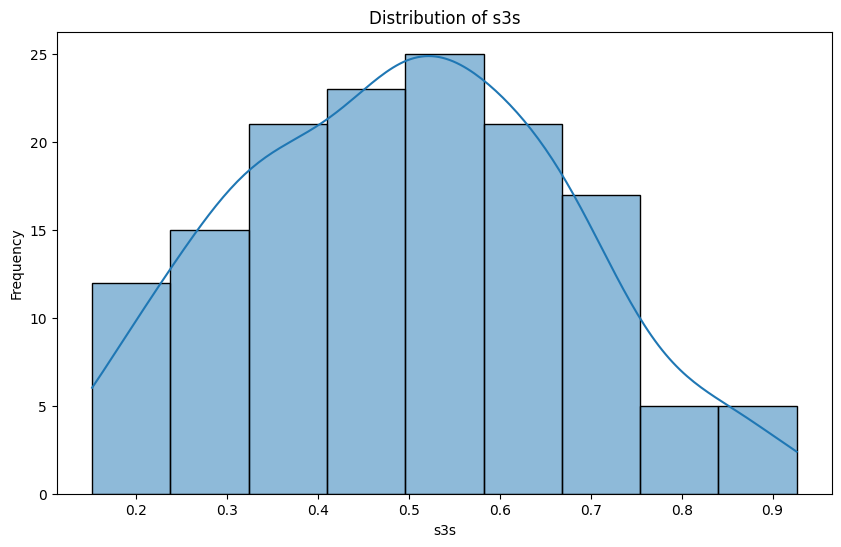


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean      88.805556
std       60.695650
min       10.000000
25%       36.000000
50%       57.000000
75%      153.500000
max      194.000000
Name: d1a, dtype: float64


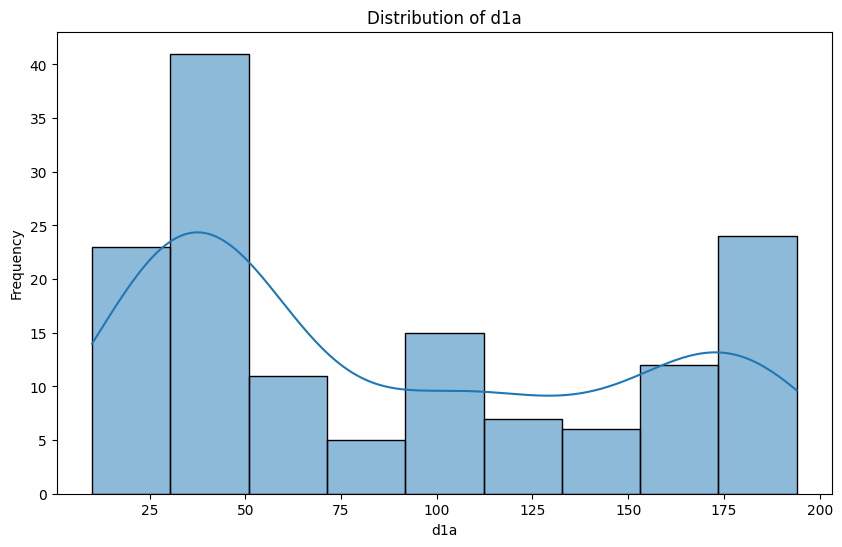


Analysis for column: d1s
Descriptive Statistics:
count    144.00000
mean       4.25000
std        1.77984
min        1.00000
25%        3.00000
50%        4.00000
75%        5.00000
max       13.00000
Name: d1s, dtype: float64


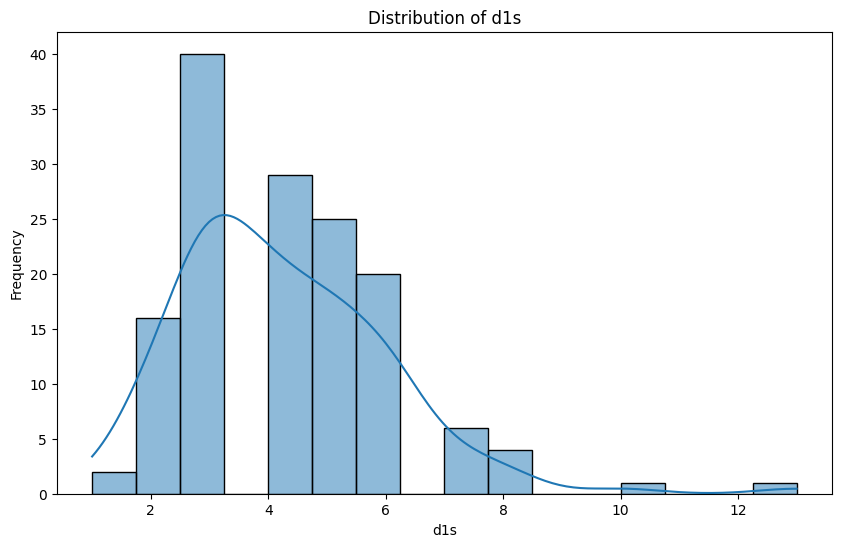


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean      85.111111
std       63.931575
min        3.000000
25%       28.750000
50%       44.500000
75%      155.500000
max      195.000000
Name: d2a, dtype: float64


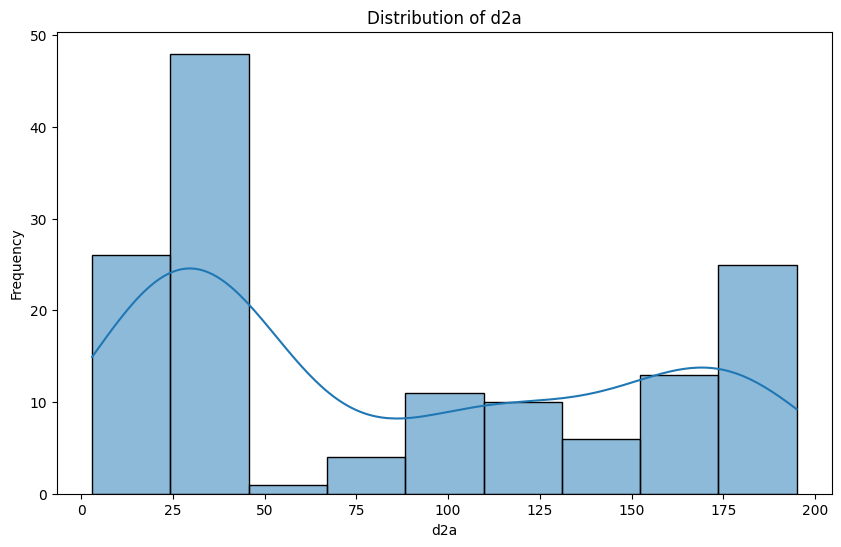


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       6.333333
std        3.266700
min        2.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       20.000000
Name: d2s, dtype: float64


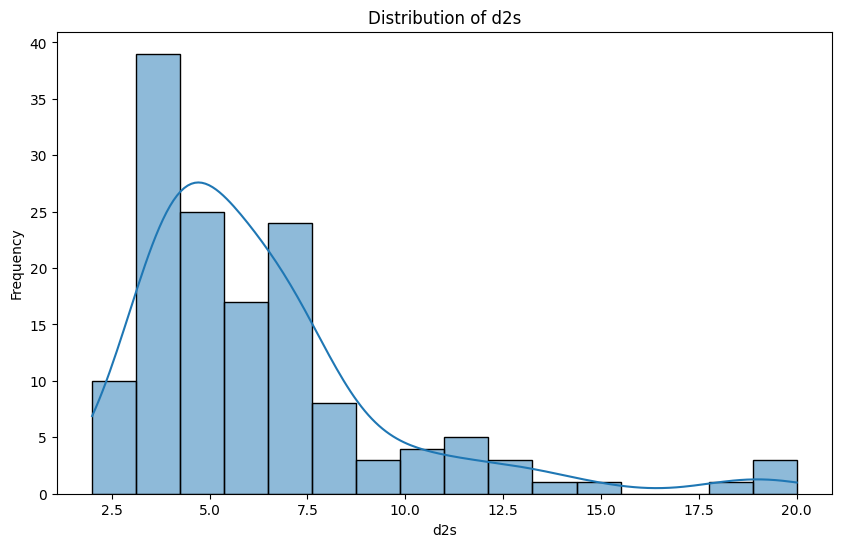


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean     104.784722
std        3.651158
min       94.000000
25%      103.000000
50%      106.000000
75%      108.000000
max      108.000000
Name: h1a, dtype: float64


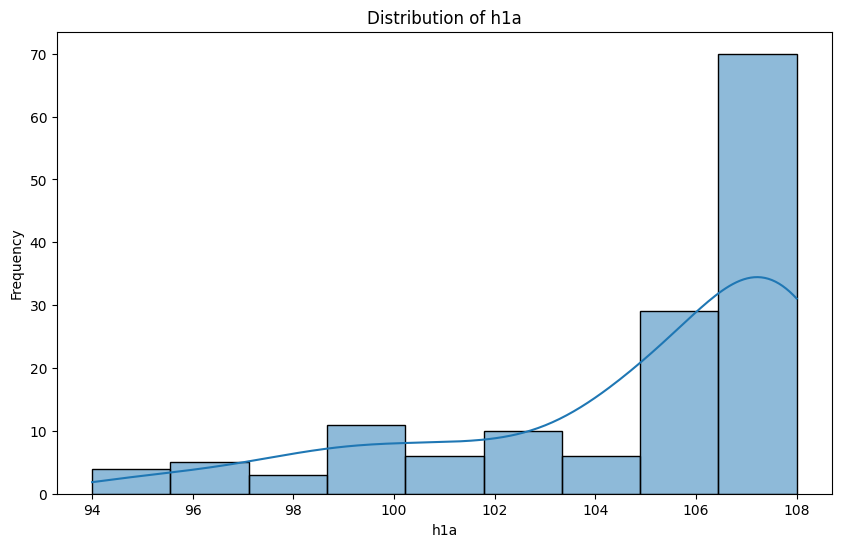


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean     105.097222
std        3.572074
min       95.000000
25%      103.000000
50%      107.000000
75%      108.000000
max      108.000000
Name: h1x, dtype: float64


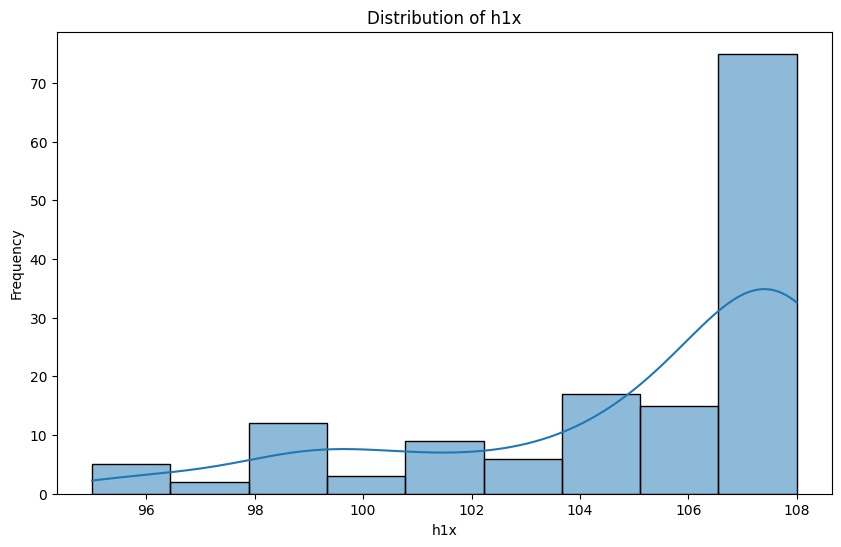


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean     104.458333
std        3.665898
min       94.000000
25%      103.000000
50%      106.000000
75%      107.000000
max      108.000000
Name: h1i, dtype: float64


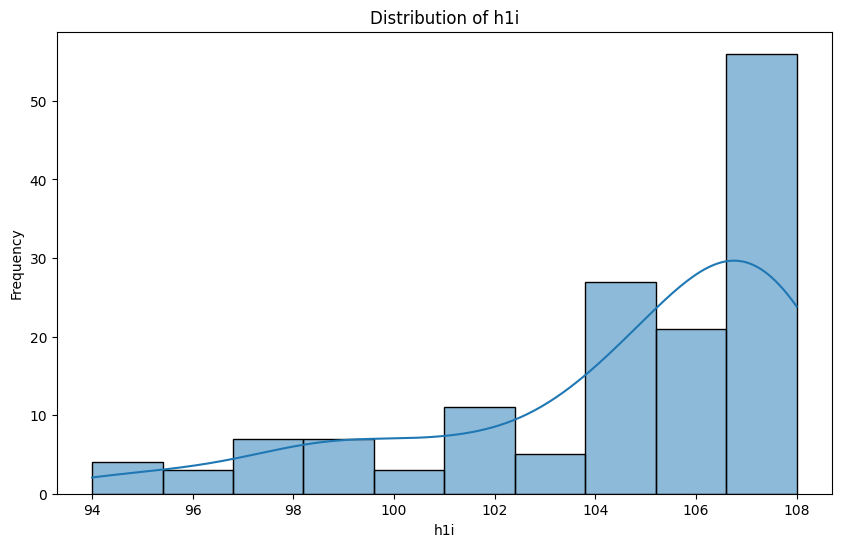


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       8.615278
std        2.347363
min        3.750000
25%        7.050000
50%        8.150000
75%       10.350000
max       12.850000
Name: t1a, dtype: float64


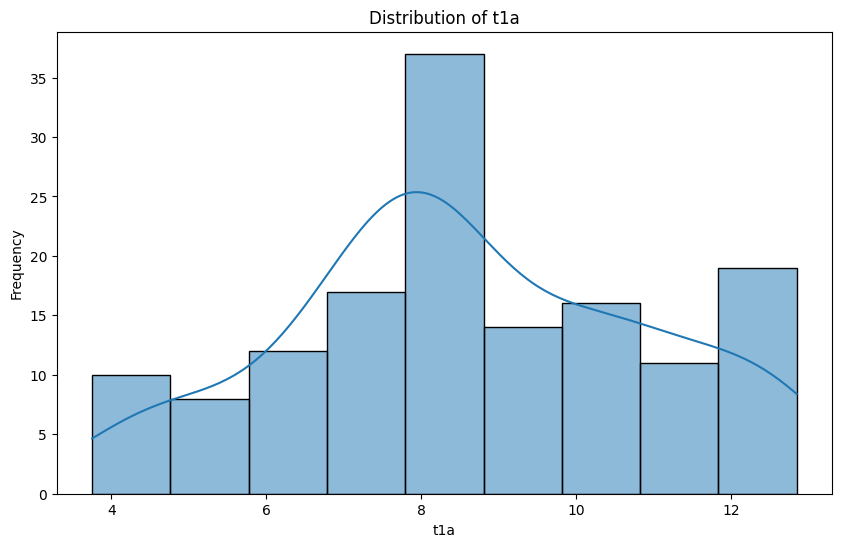


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       8.719444
std        2.348315
min        3.750000
25%        7.150000
50%        8.250000
75%       10.450000
max       12.950000
Name: t1x, dtype: float64


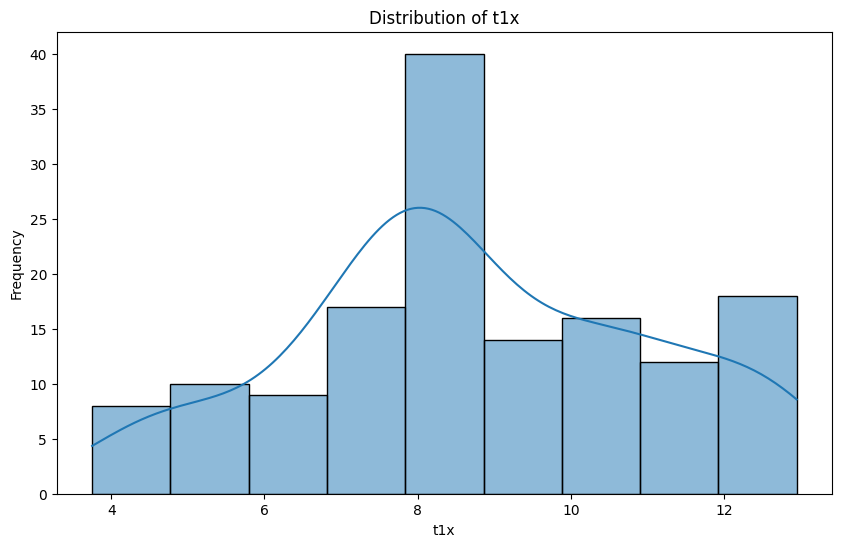


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       8.519444
std        2.346468
min        3.750000
25%        6.850000
50%        8.050000
75%       10.350000
max       12.850000
Name: t1i, dtype: float64


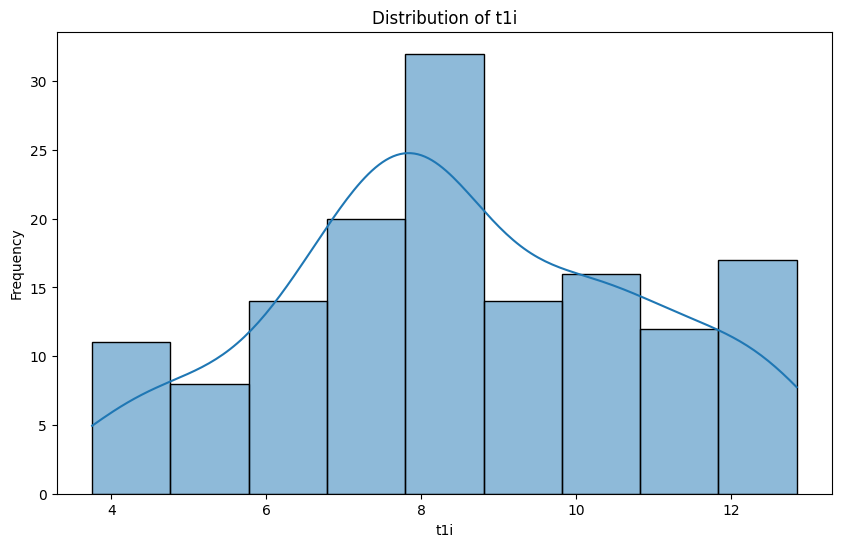


Analysis for column: b1a
Descriptive Statistics:
count    144.000000
mean     997.611111
std        0.592625
min      997.000000
25%      997.000000
50%      998.000000
75%      998.000000
max      999.000000
Name: b1a, dtype: float64


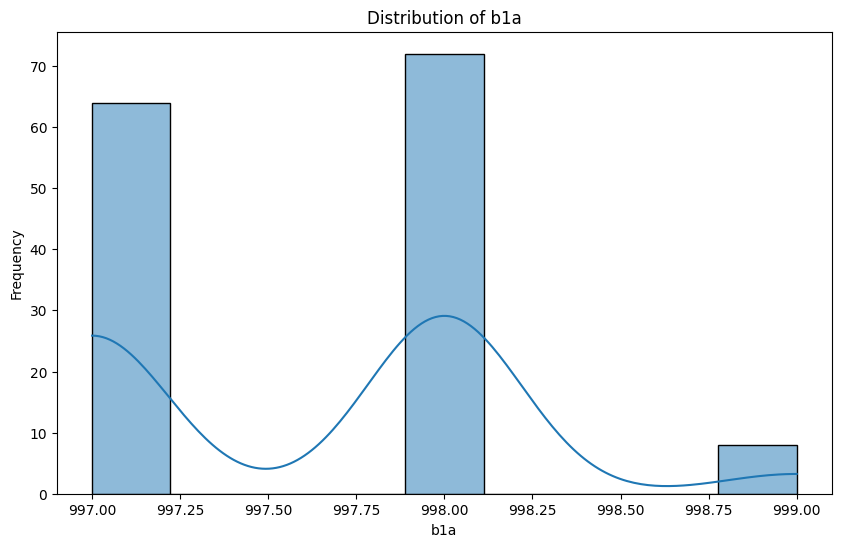


Analysis for column: b1x
Descriptive Statistics:
count    144.000000
mean     997.916667
std        0.522233
min      997.000000
25%      998.000000
50%      998.000000
75%      998.000000
max      999.000000
Name: b1x, dtype: float64


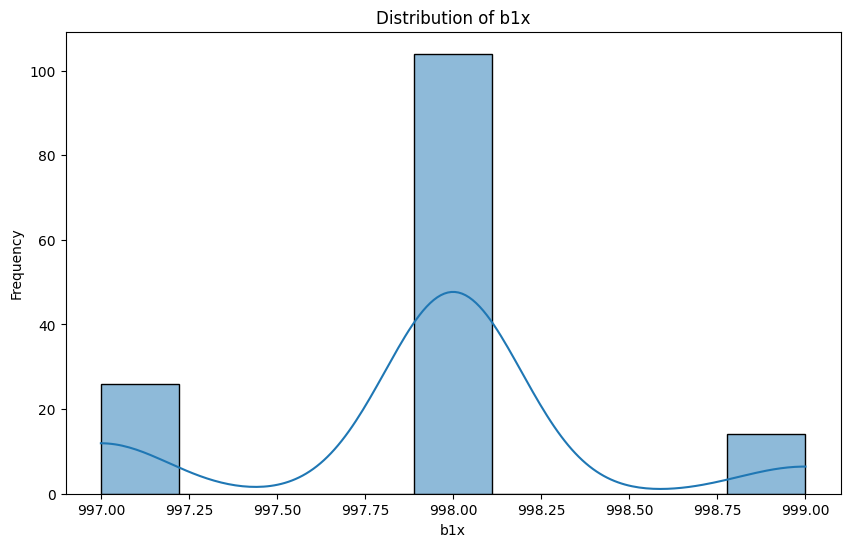


Analysis for column: b1i
Descriptive Statistics:
count    144.000000
mean     997.270833
std        0.518453
min      996.000000
25%      997.000000
50%      997.000000
75%      997.250000
max      999.000000
Name: b1i, dtype: float64


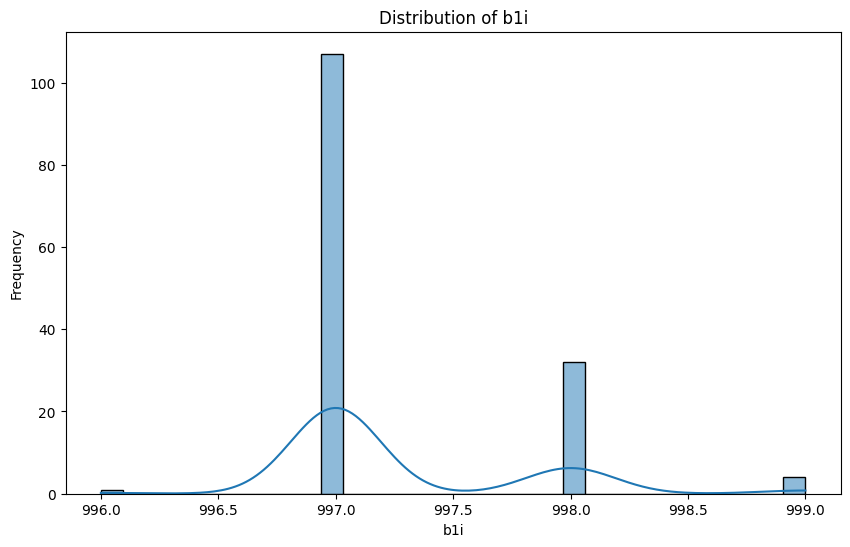


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       4.990162
std        1.185865
min        2.497580
25%        4.053040
50%        4.943675
75%        5.960398
max        7.527320
Name: p1a, dtype: float64


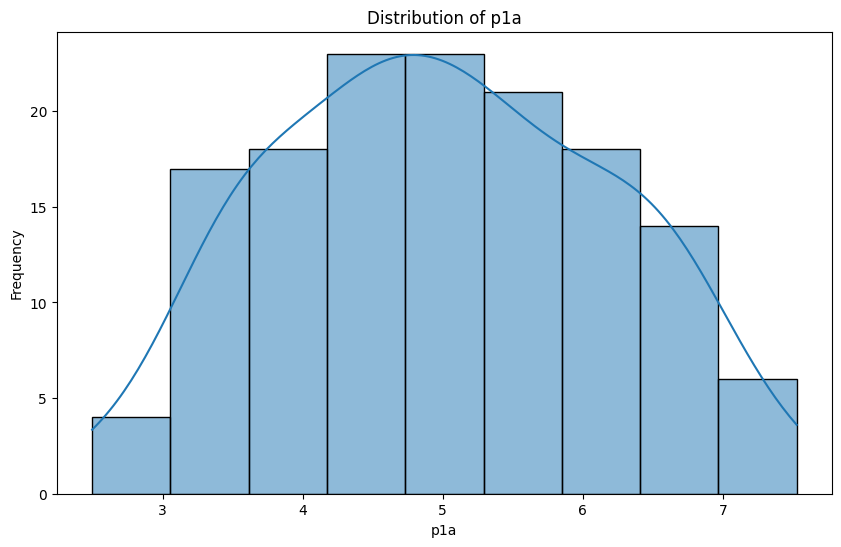


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       6.290707
std        1.463113
min        3.162400
25%        5.202725
50%        6.119725
75%        7.472300
max        9.306300
Name: p1x, dtype: float64


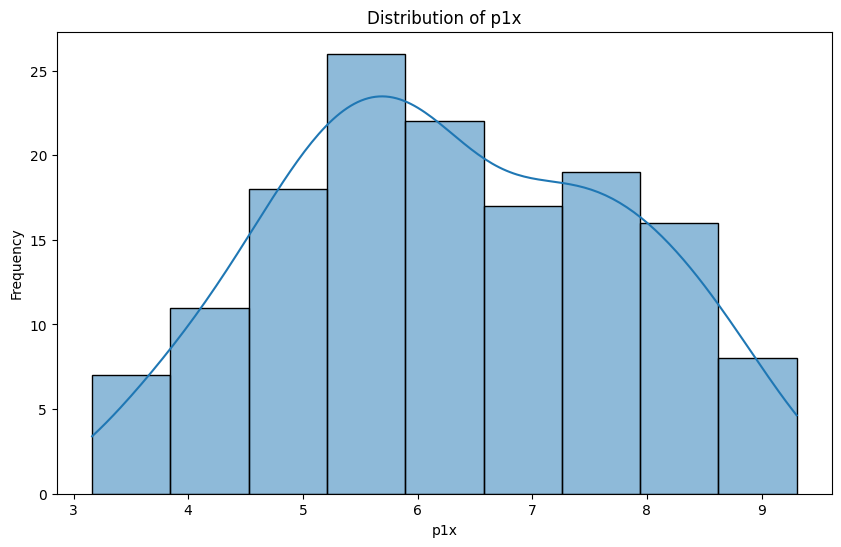


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       3.601159
std        0.936584
min        1.099150
25%        2.921687
50%        3.666750
75%        4.228413
max        5.821700
Name: p1i, dtype: float64


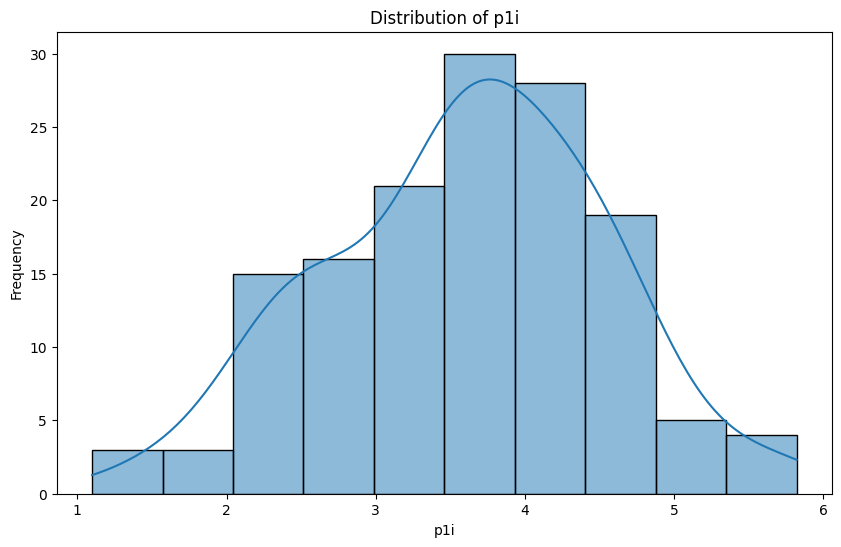


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.512121
std        0.175057
min        0.165060
25%        0.387437
50%        0.524985
75%        0.623560
max        0.972020
Name: p1s, dtype: float64


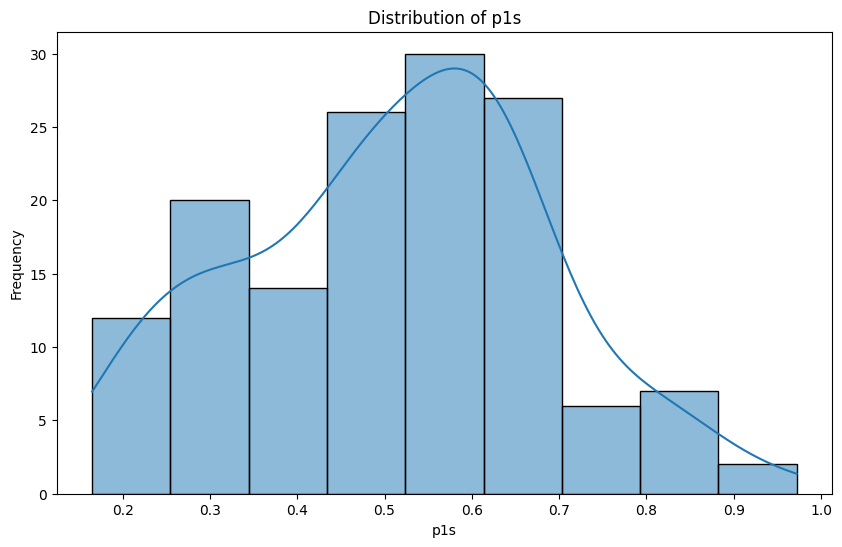


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      49.750000
std        3.231185
min       45.000000
25%       47.000000
50%       49.000000
75%       52.250000
max       56.000000
Name: tia, dtype: float64


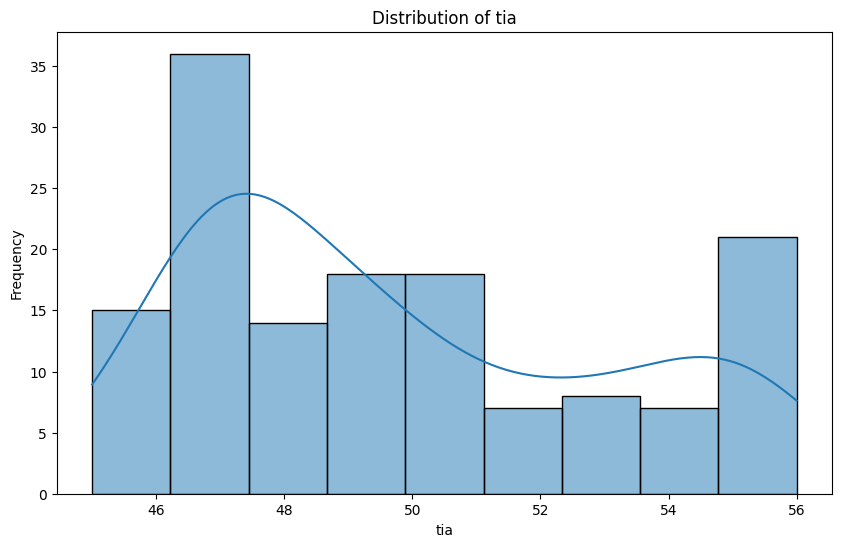


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      49.819444
std        3.222848
min       45.000000
25%       47.000000
50%       49.000000
75%       52.250000
max       56.000000
Name: tix, dtype: float64


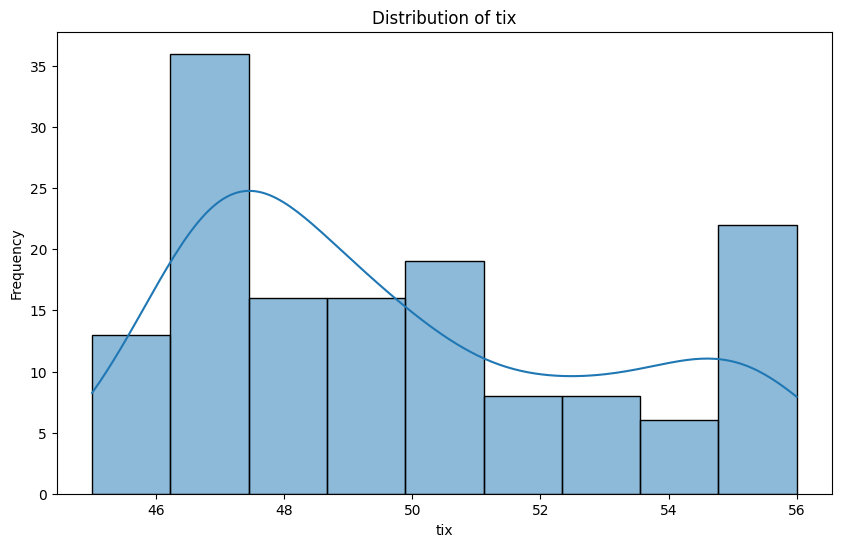


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      49.666667
std        3.184315
min       45.000000
25%       47.000000
50%       49.000000
75%       52.000000
max       56.000000
Name: tii, dtype: float64


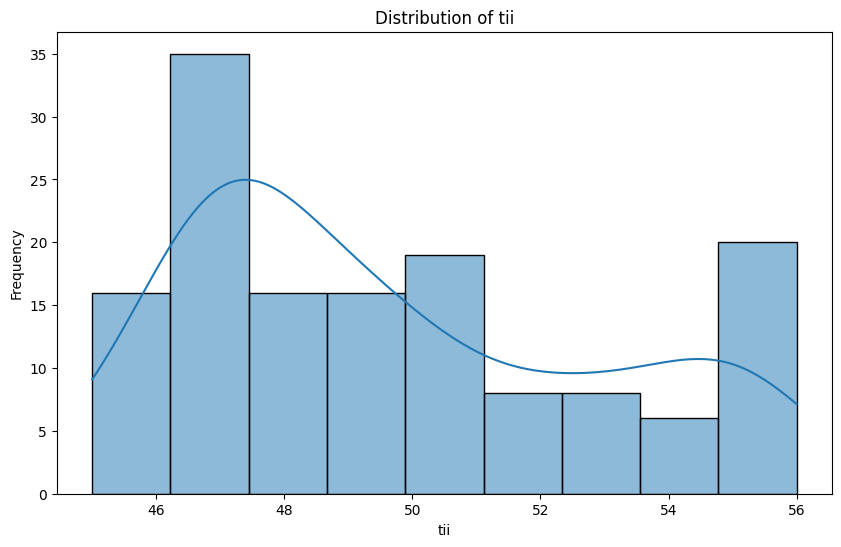


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     129.743056
std        4.616399
min      125.000000
25%      126.000000
50%      127.000000
75%      136.000000
max      137.000000
Name: vxa, dtype: float64


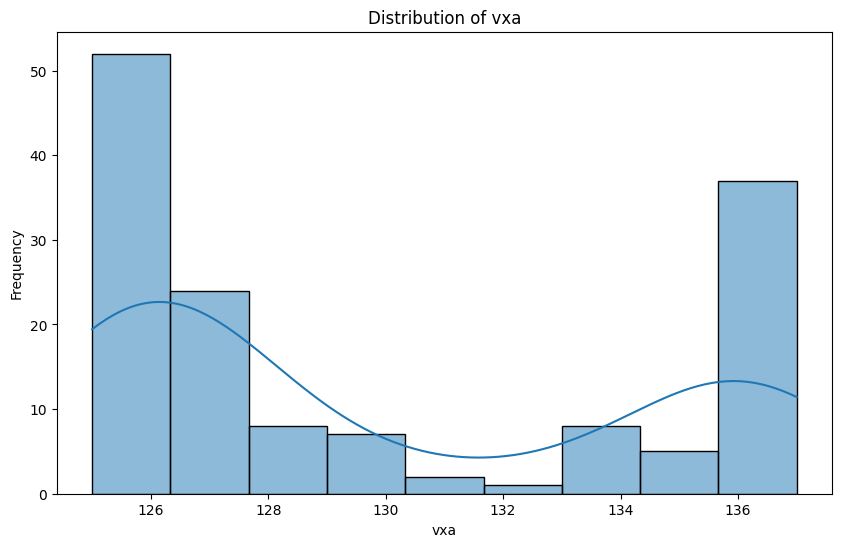


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     130.027778
std        4.868831
min      125.000000
25%      126.000000
50%      127.000000
75%      136.000000
max      139.000000
Name: vxx, dtype: float64


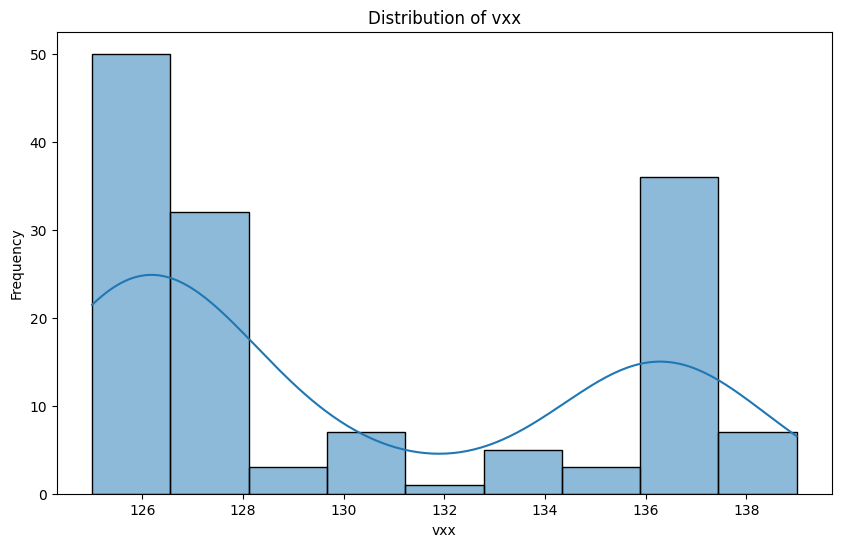


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     129.395833
std        4.364861
min      125.000000
25%      126.000000
50%      127.000000
75%      135.000000
max      137.000000
Name: vxi, dtype: float64


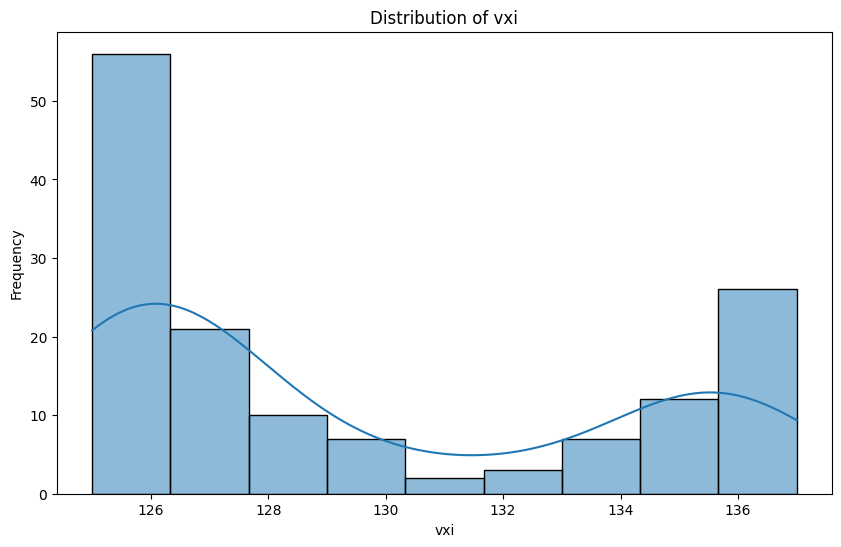


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


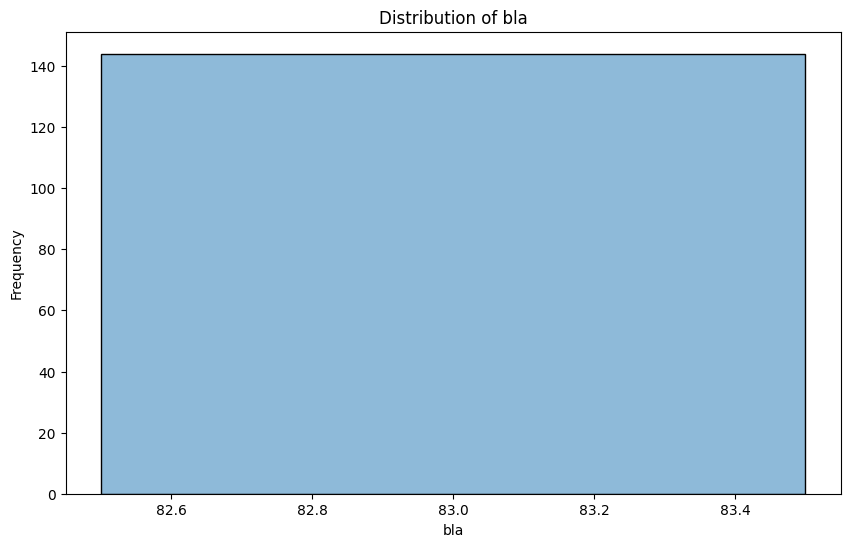


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


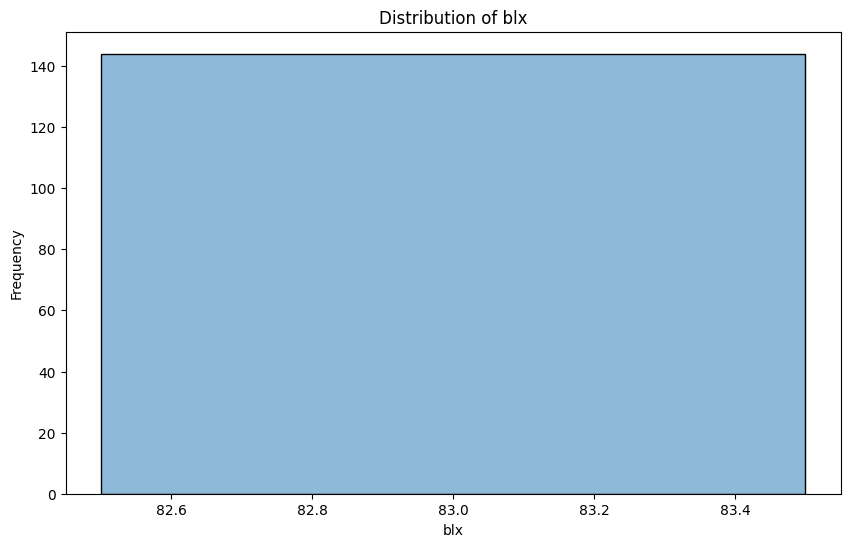


Analysis for column: bli
Descriptive Statistics:
count    144.000000
mean      82.979167
std        0.143325
min       82.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       83.000000
Name: bli, dtype: float64


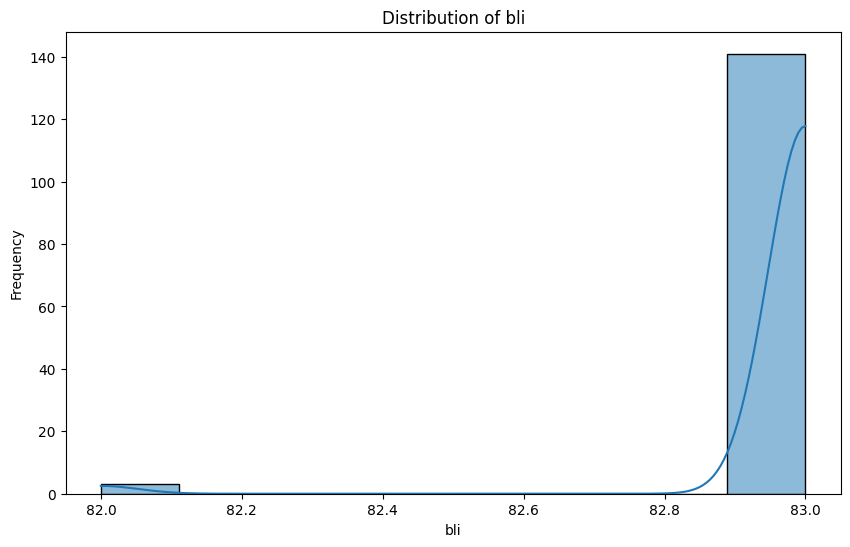


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


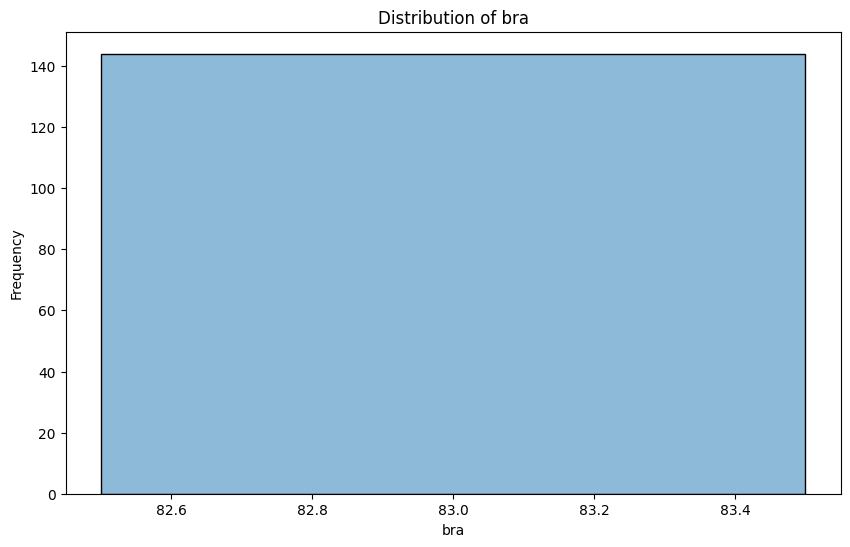


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


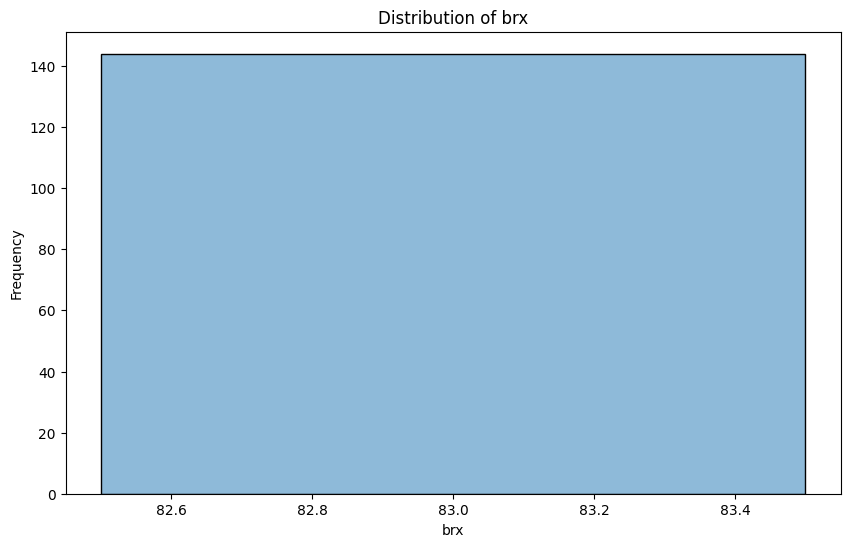


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


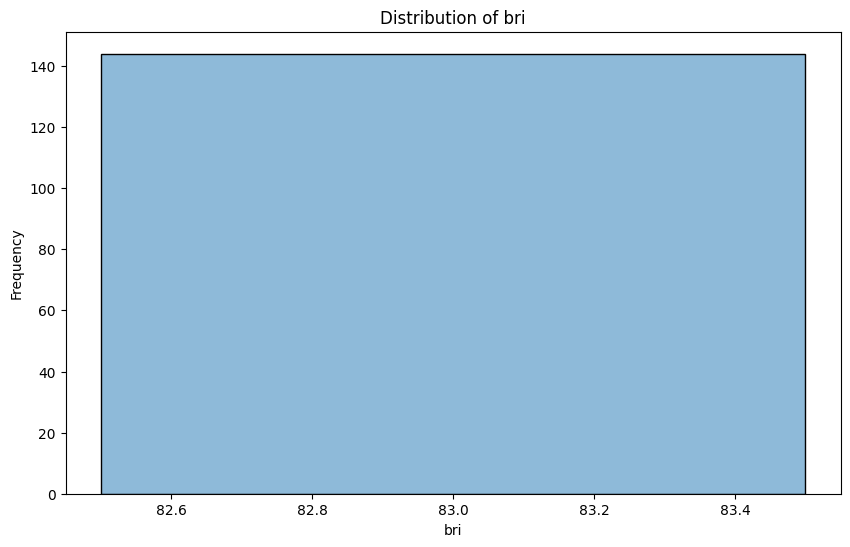

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

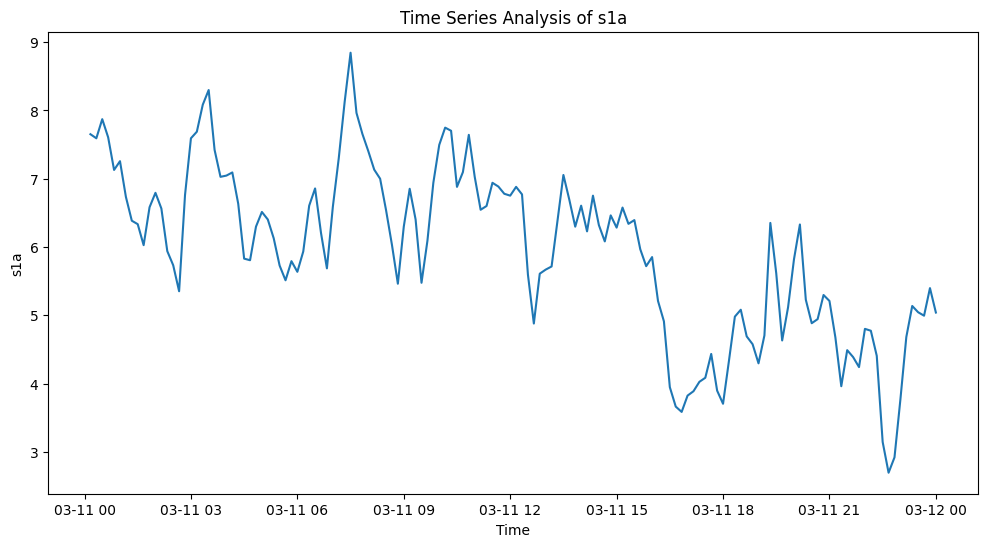

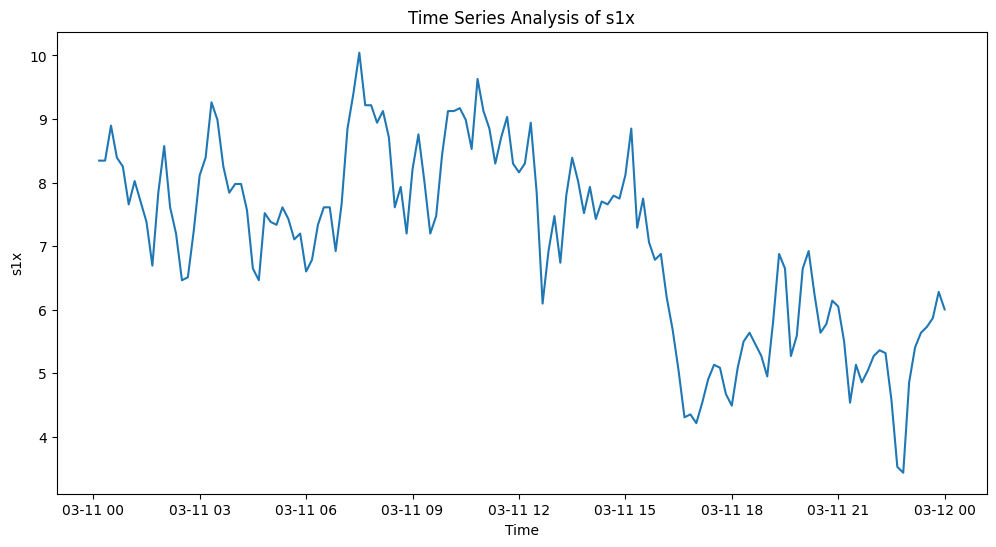

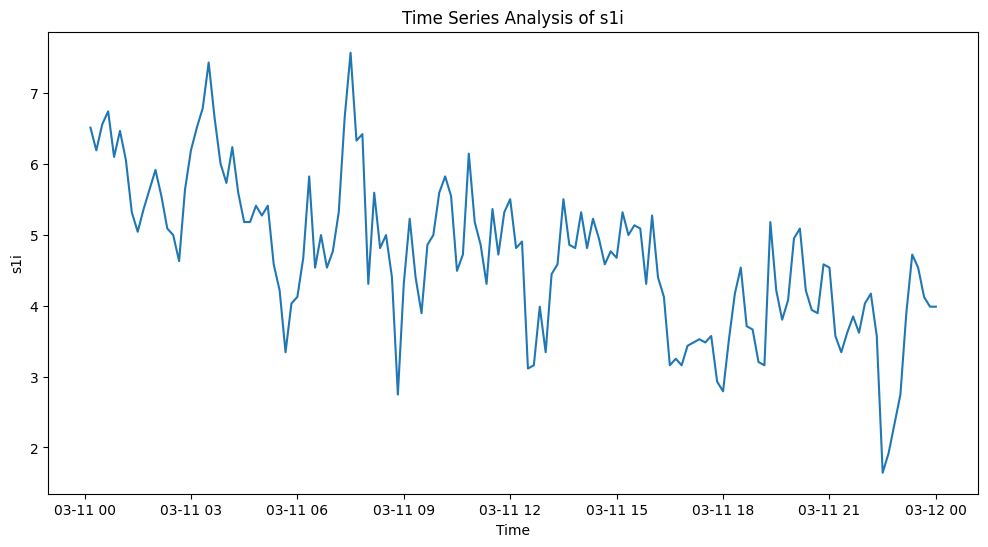

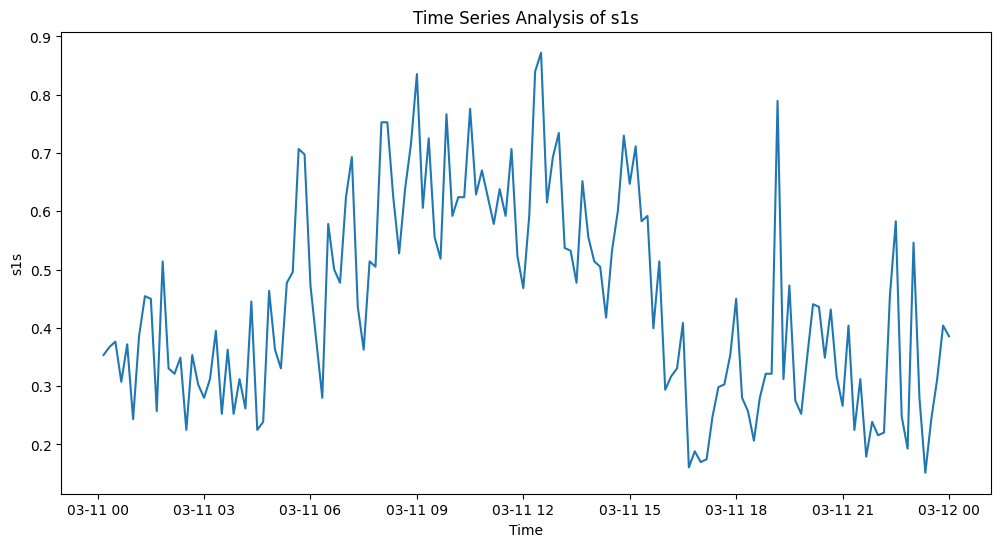

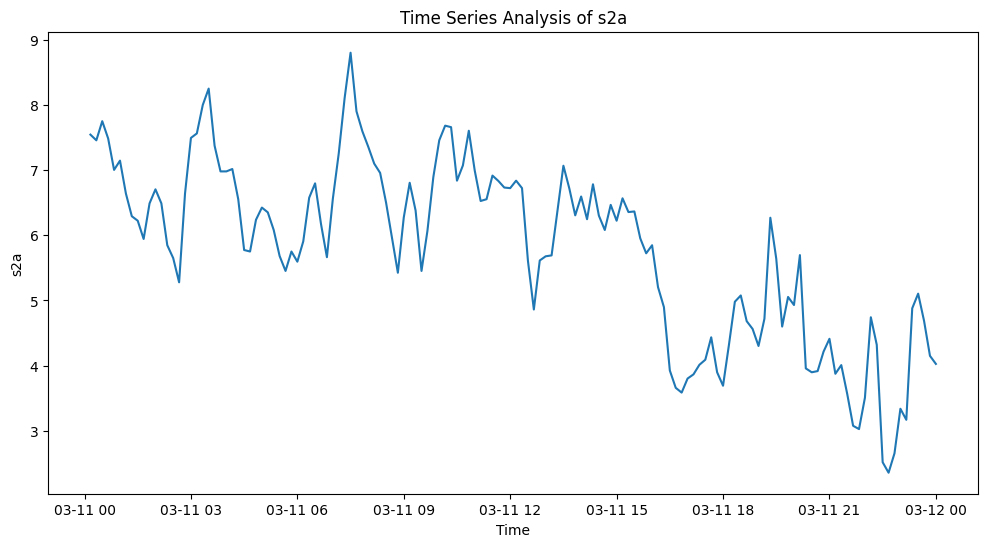

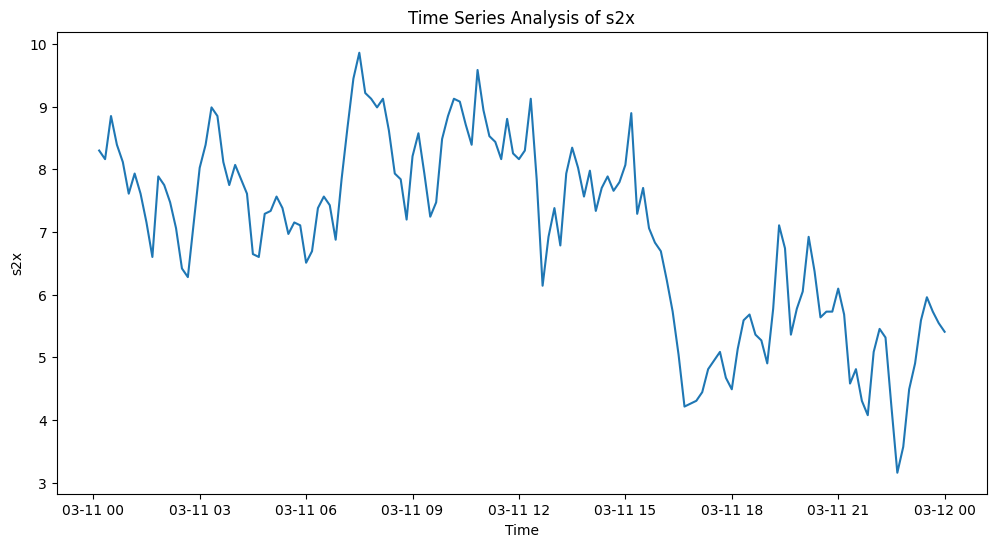

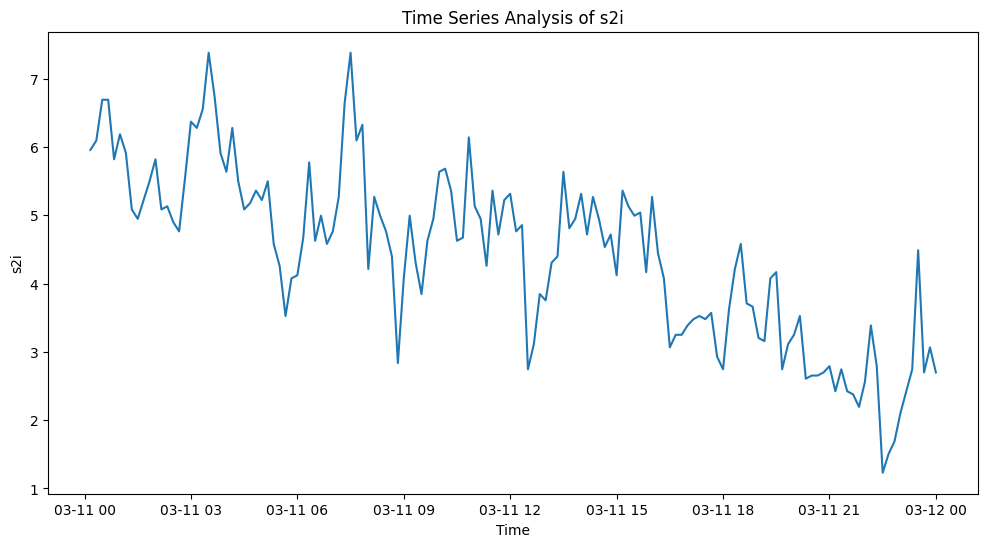

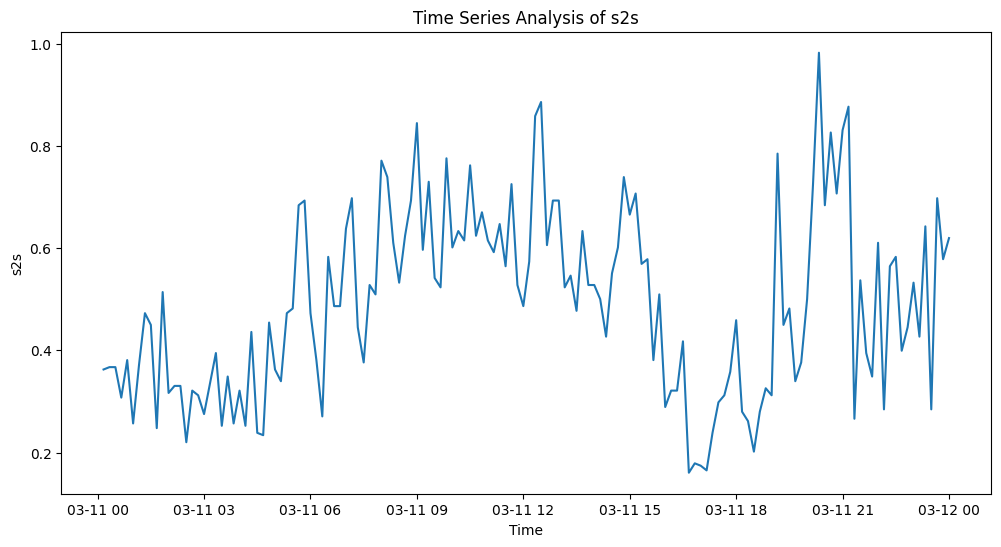

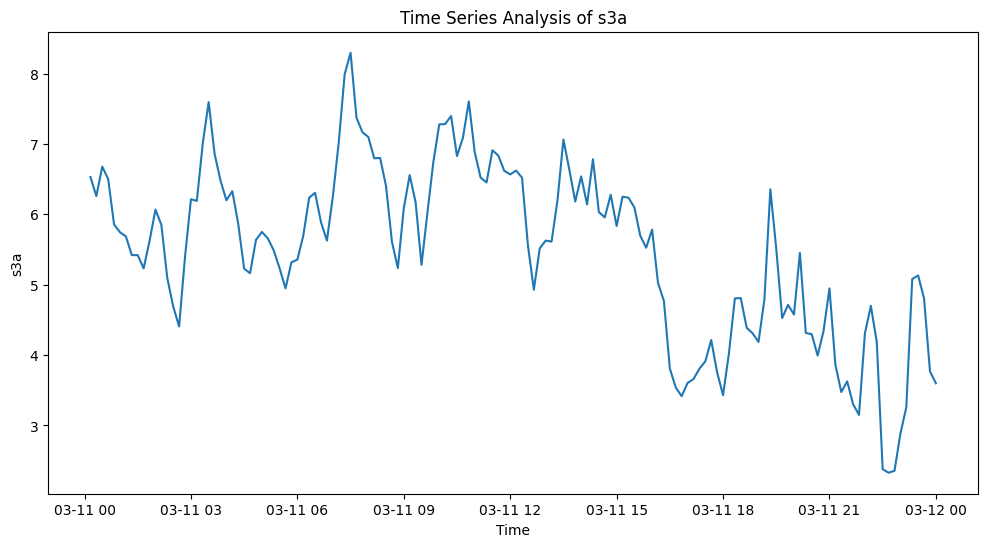

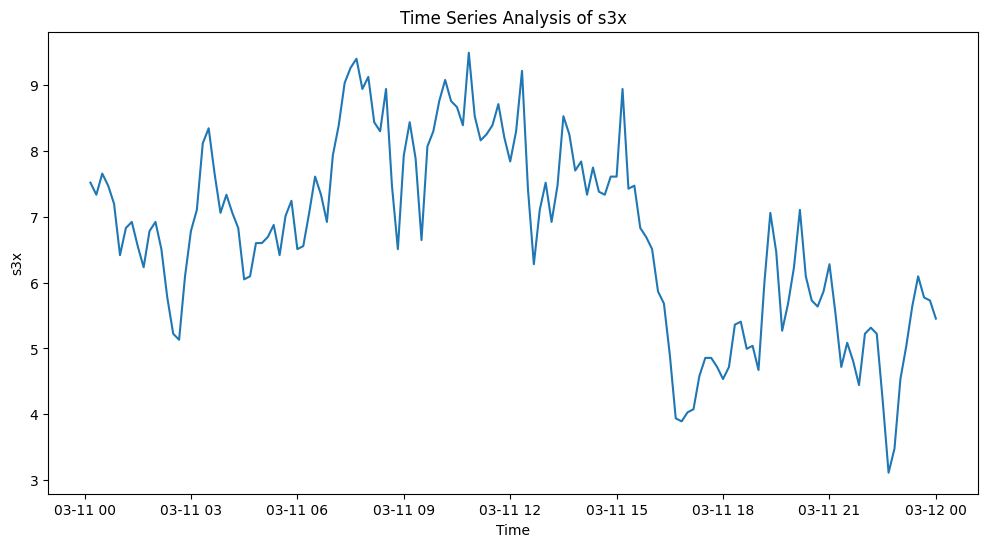

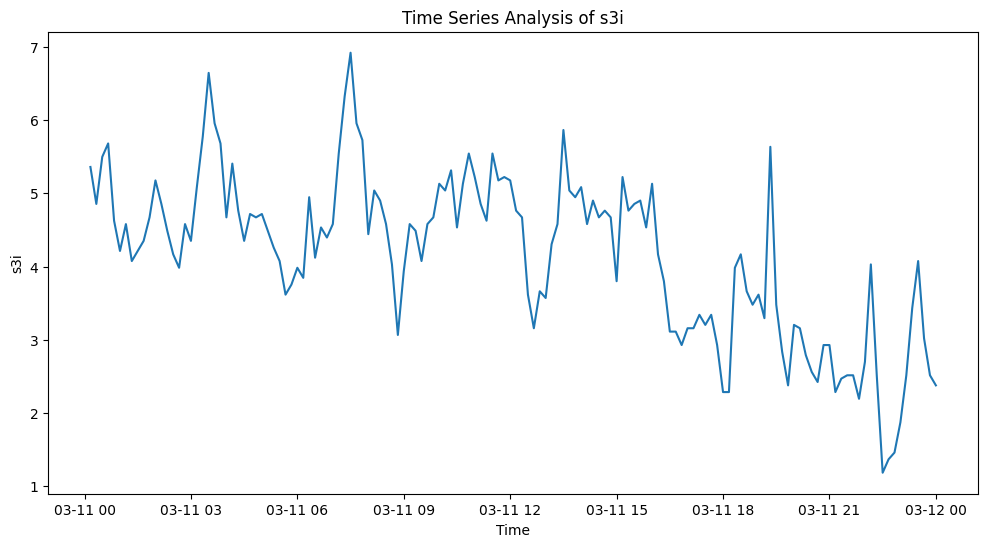

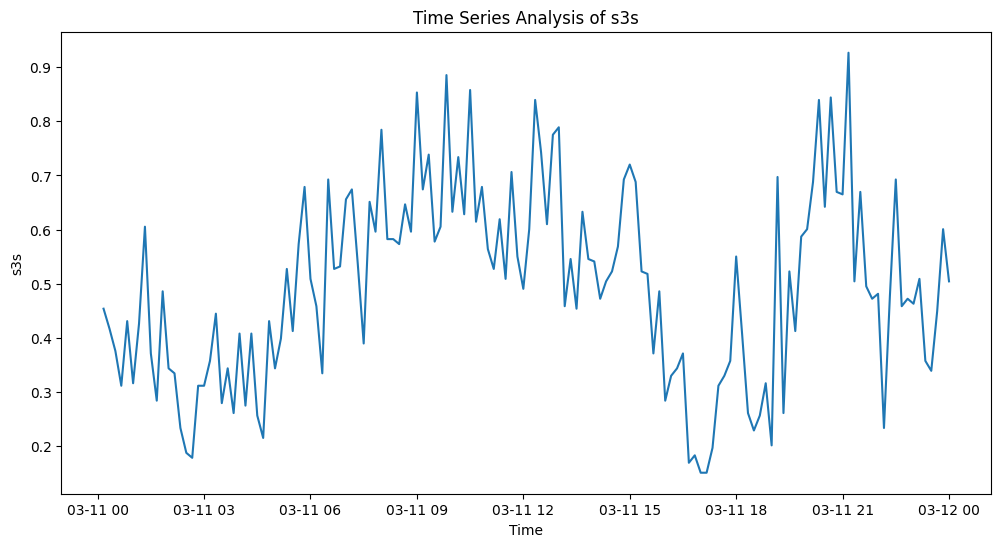

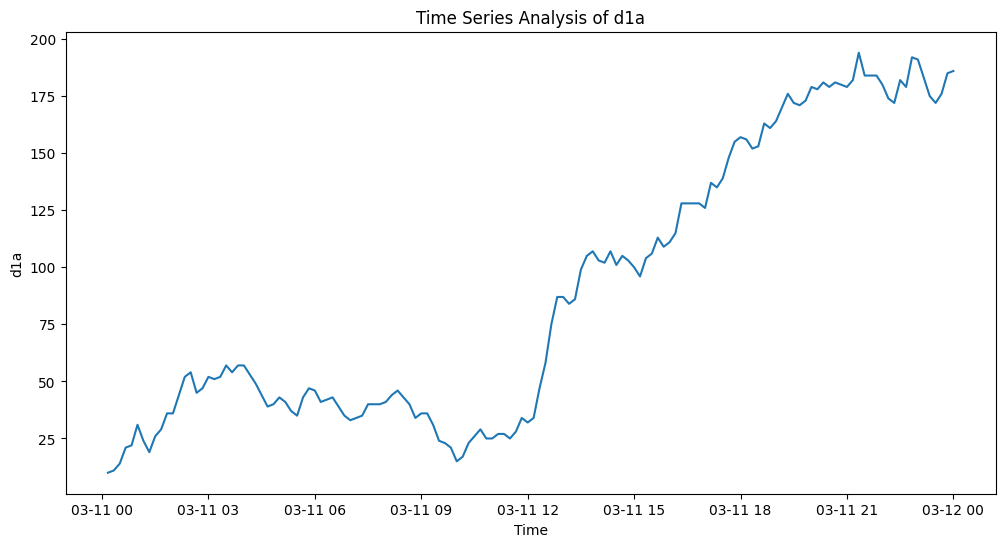

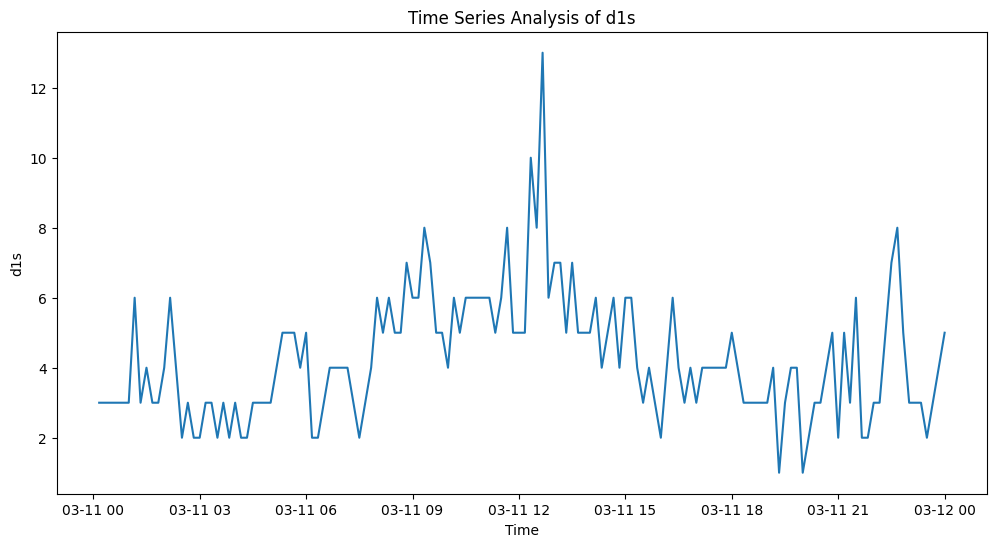

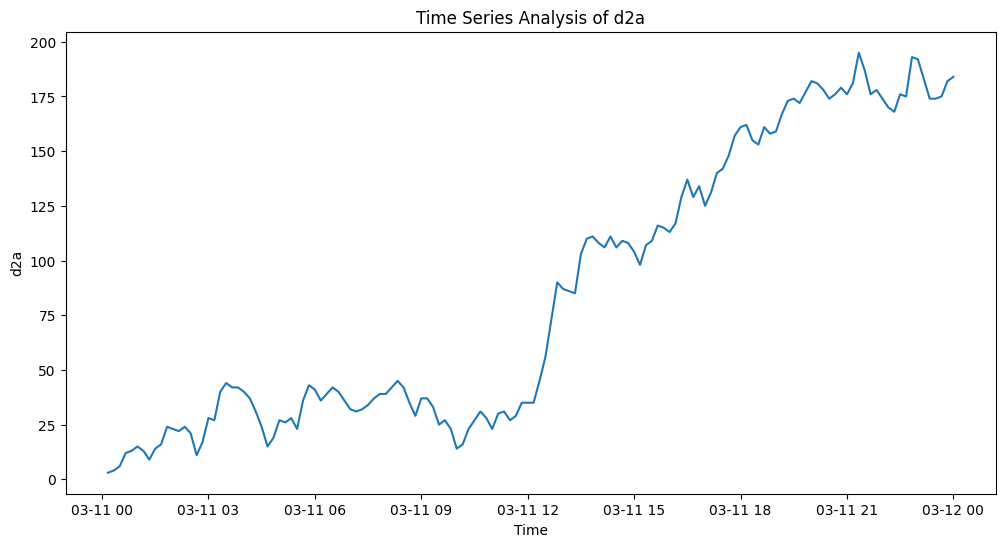

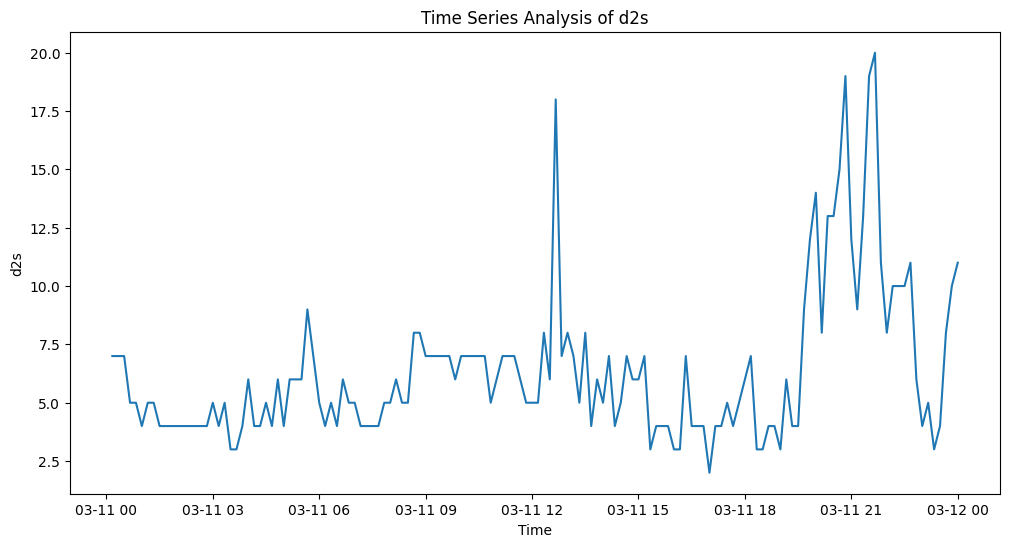

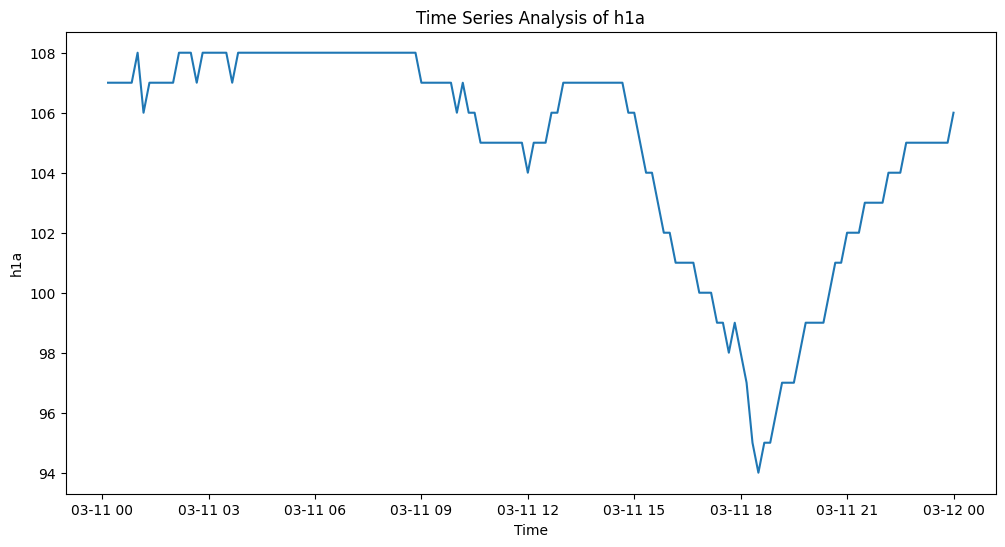

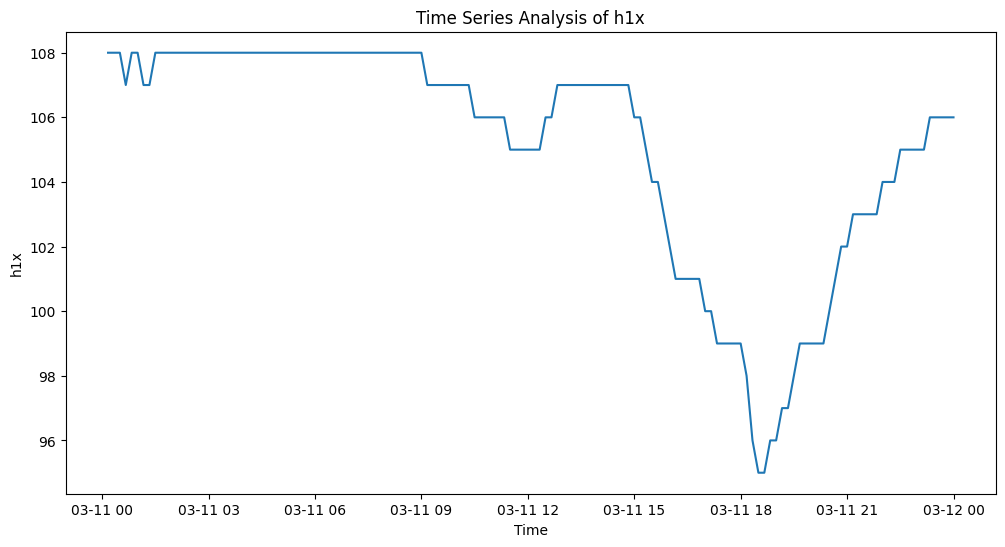

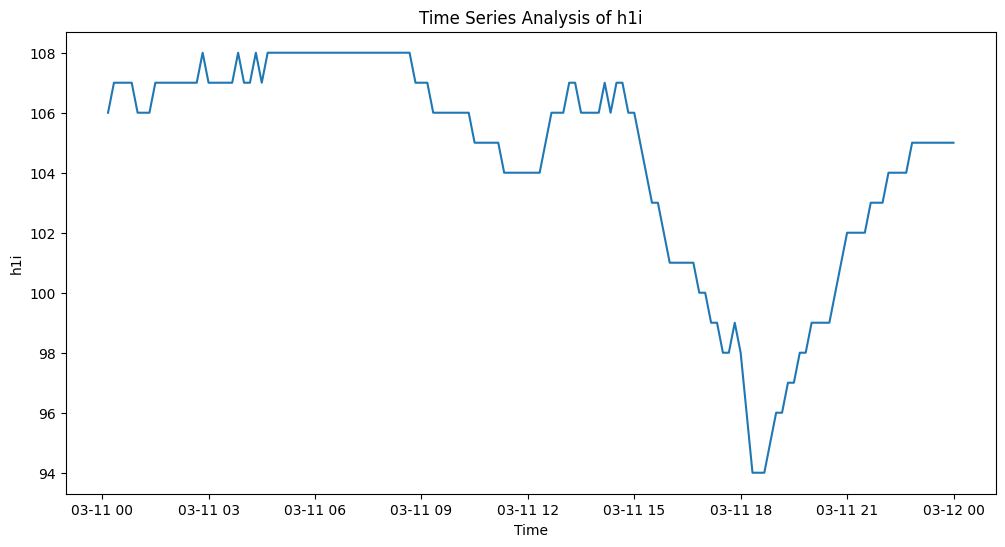

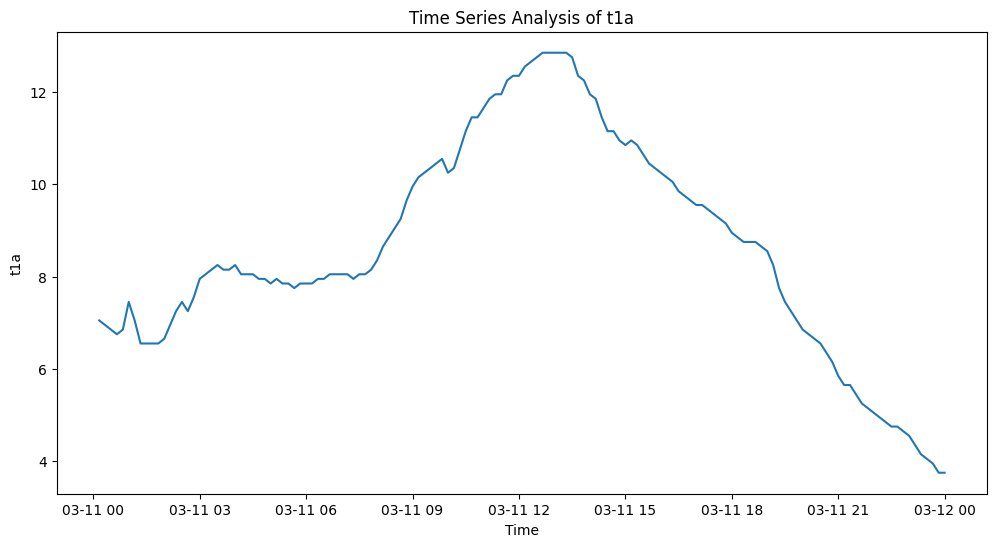

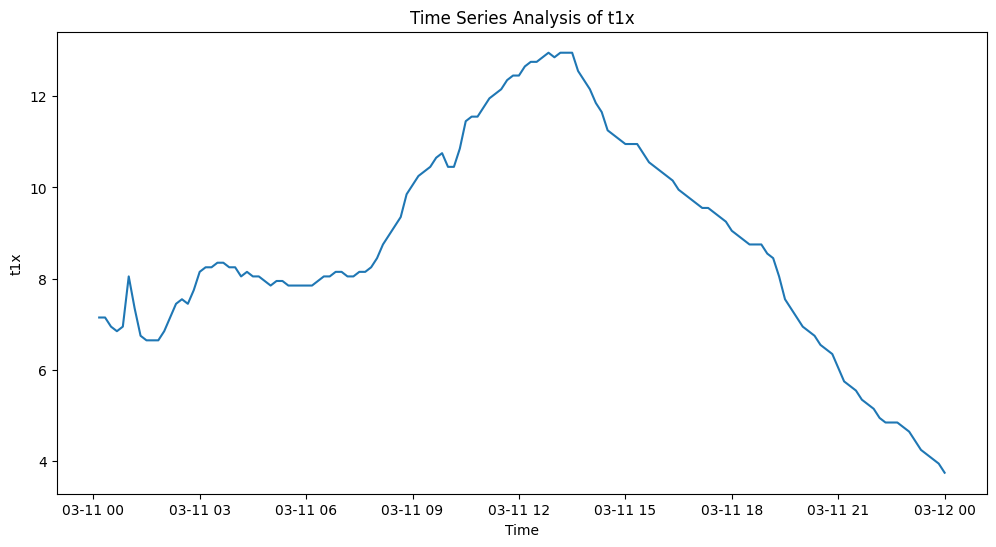

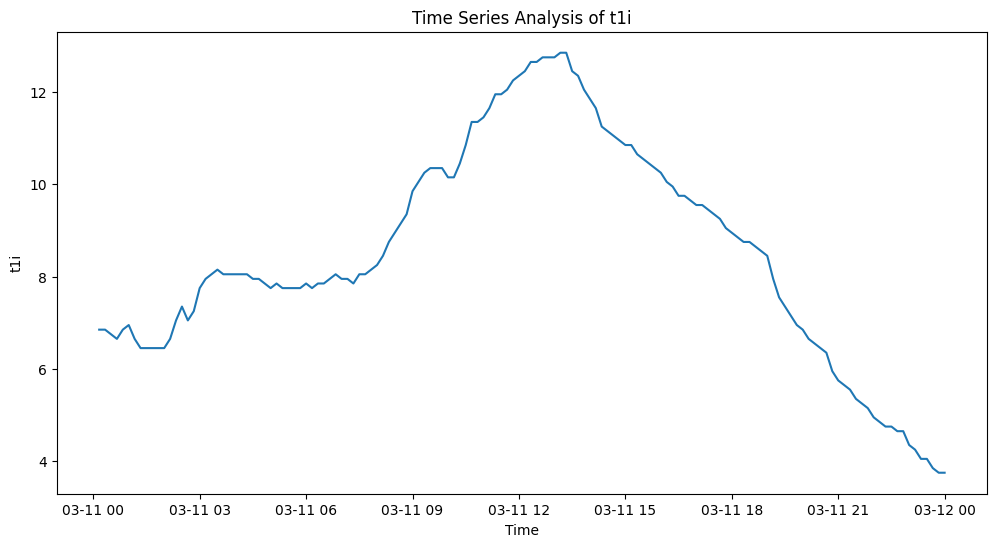

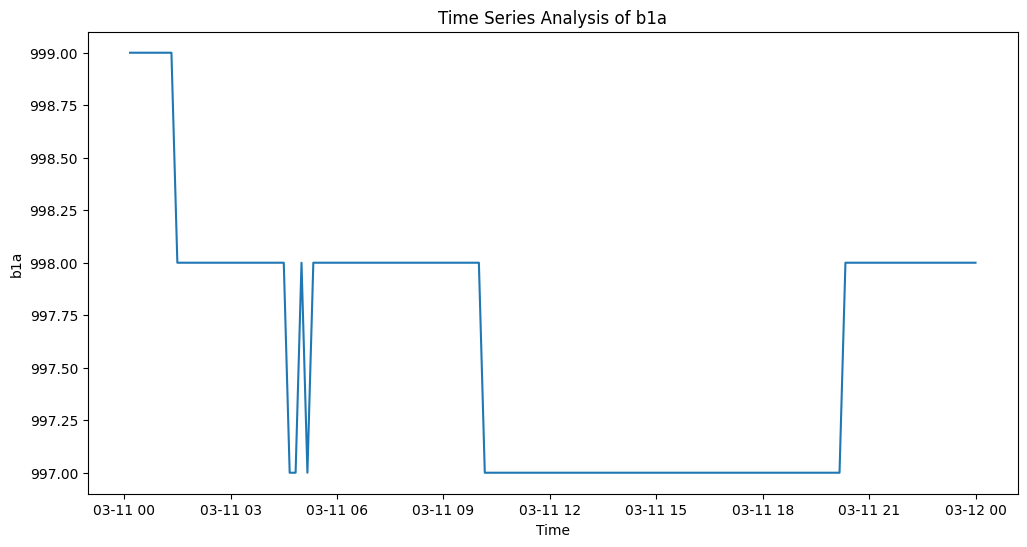

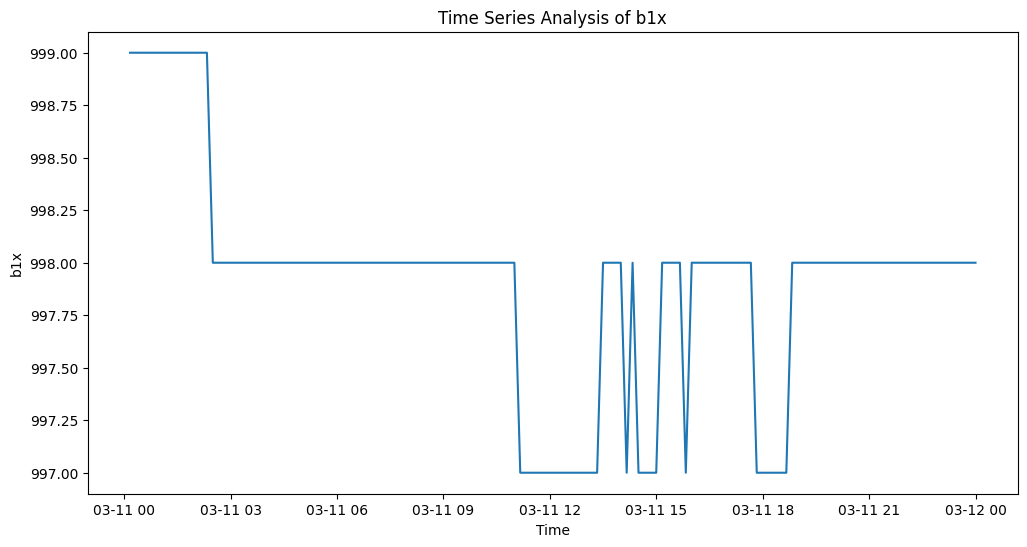

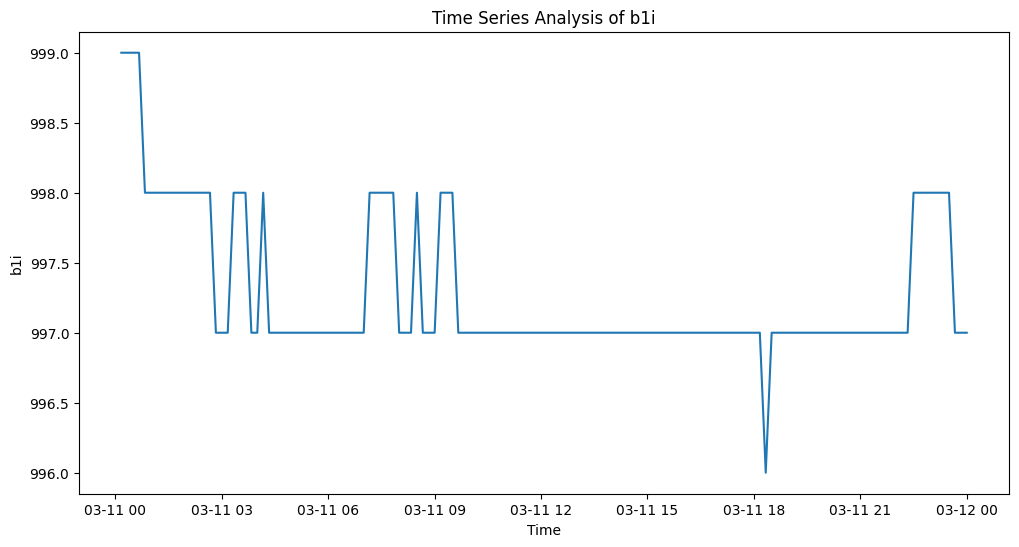

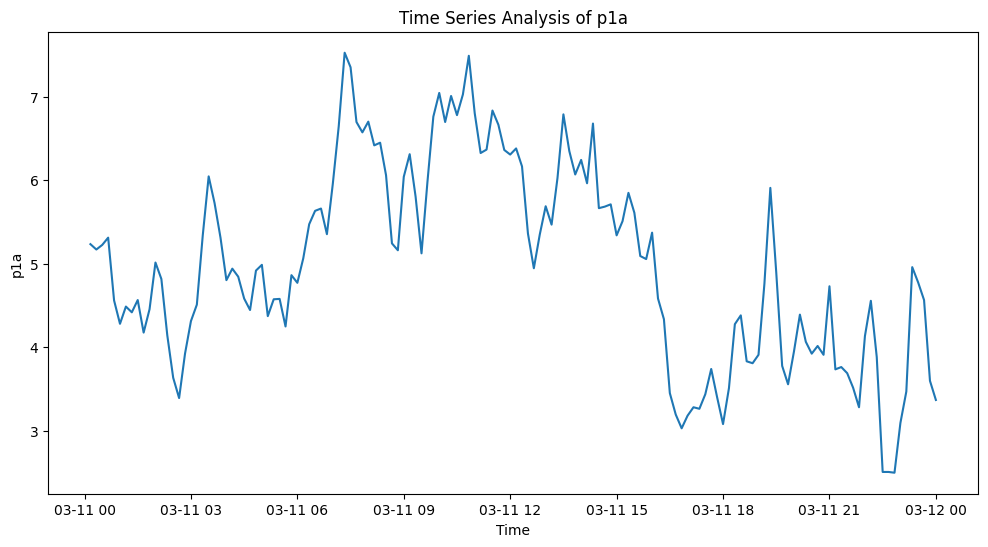

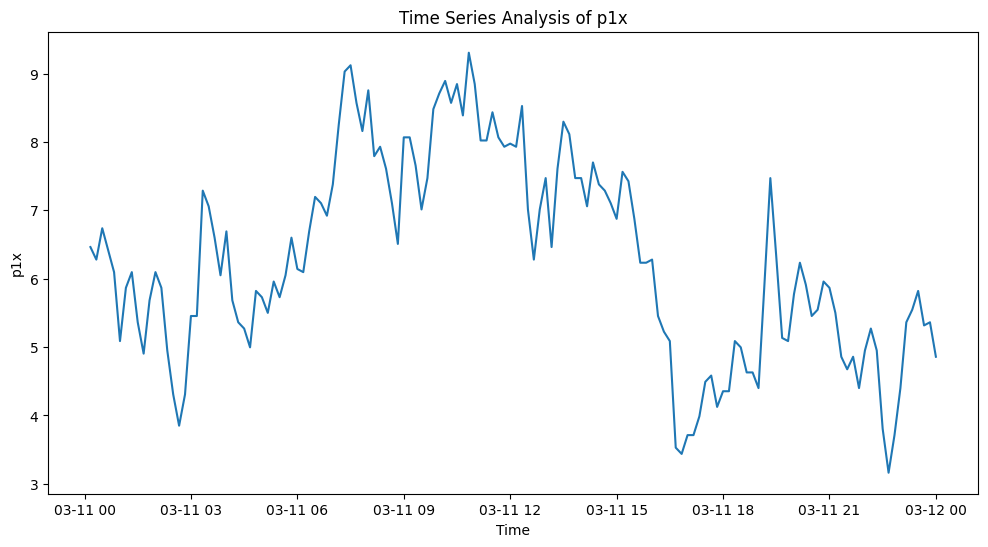

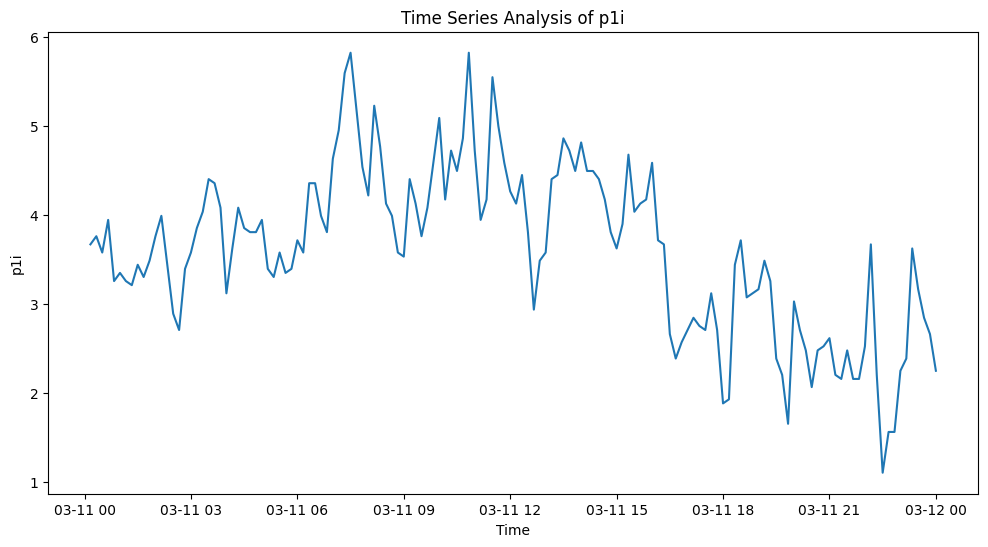

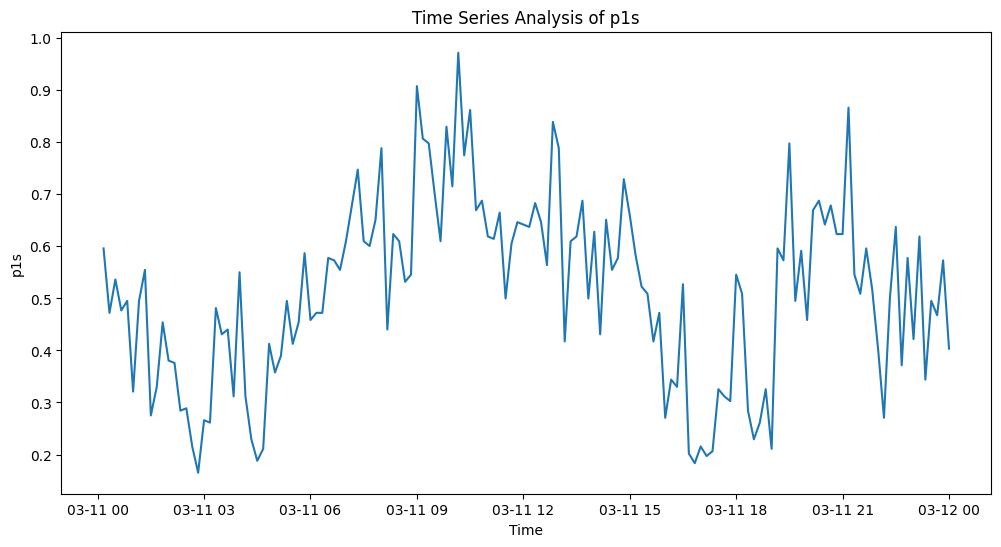

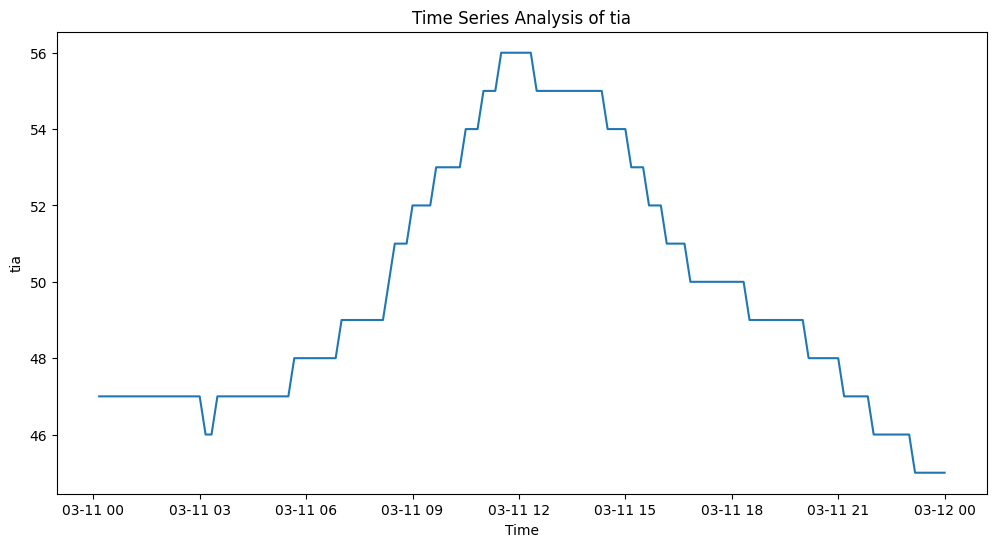

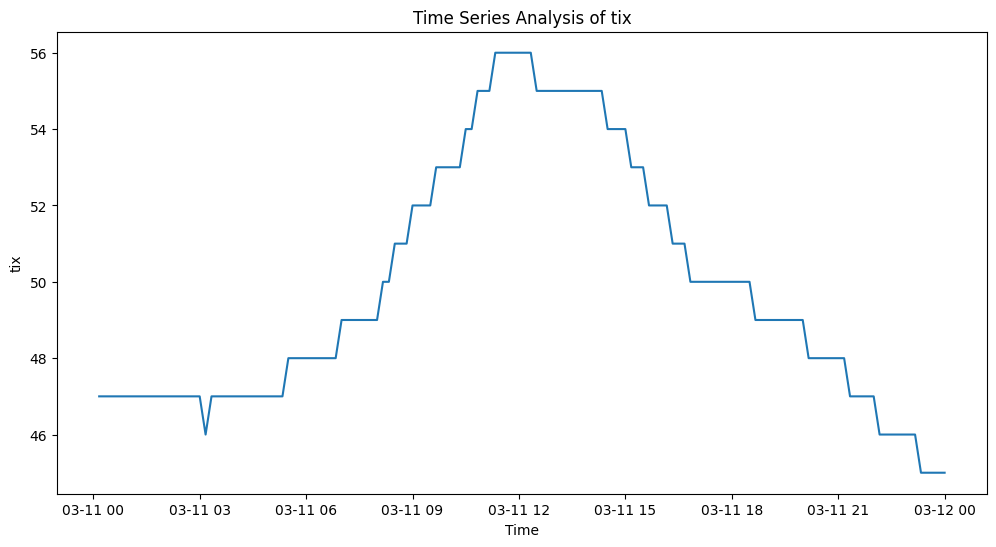

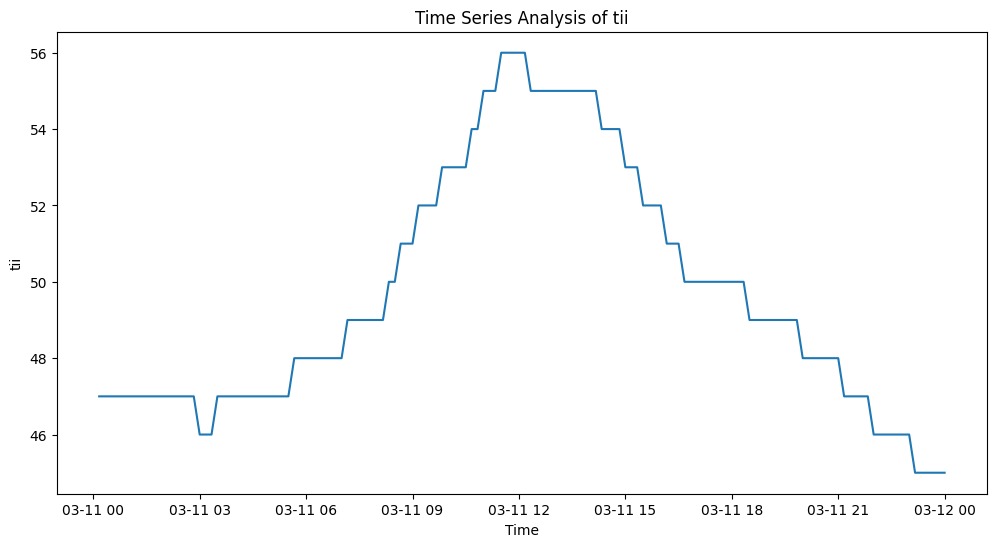

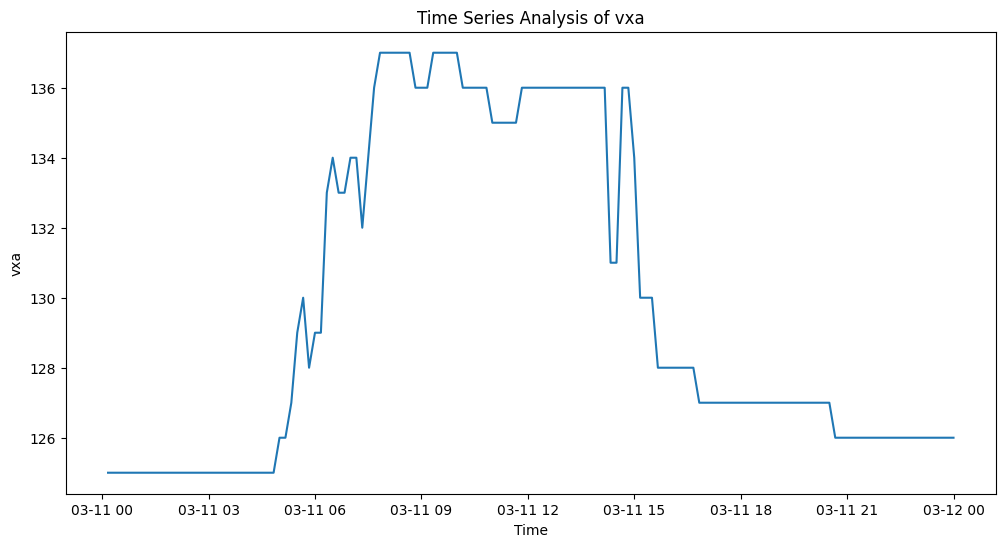

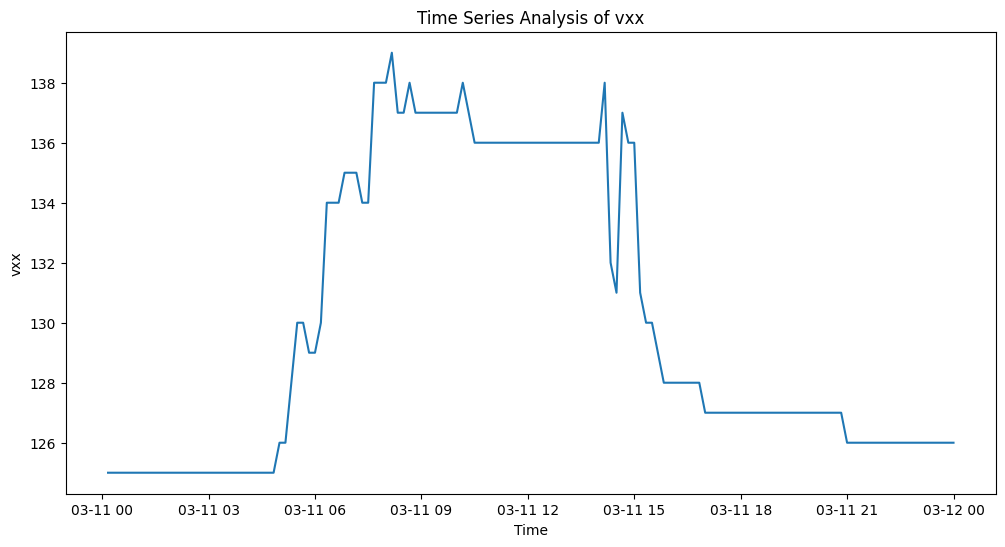

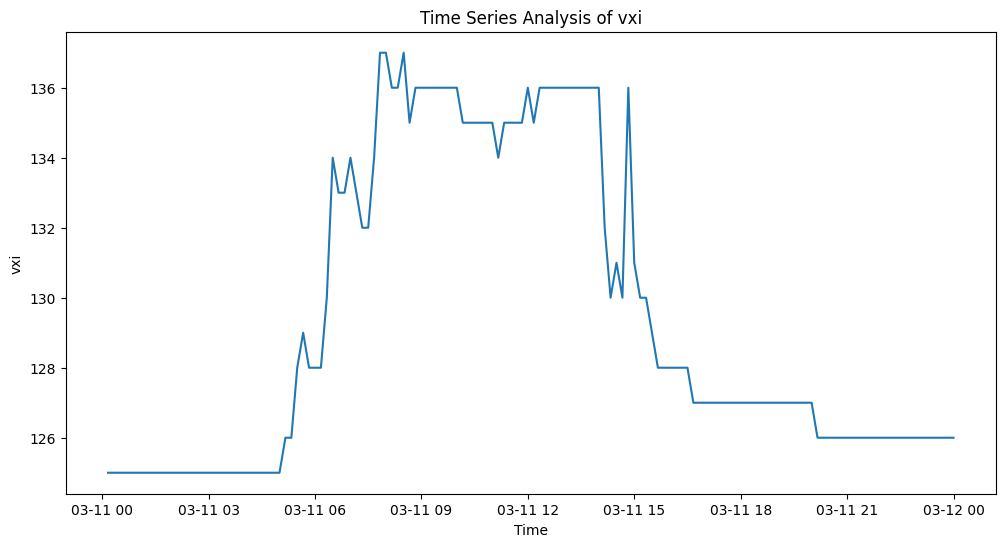

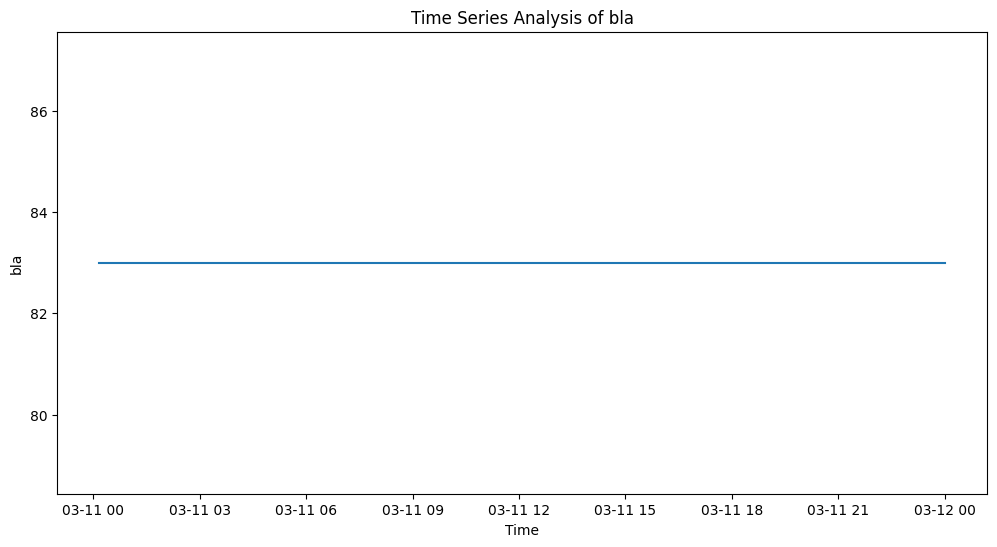

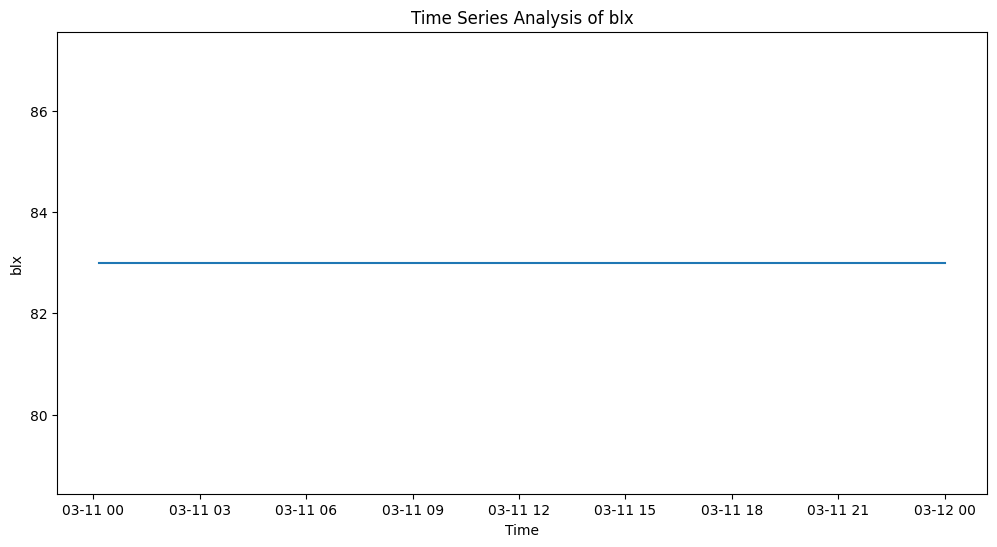

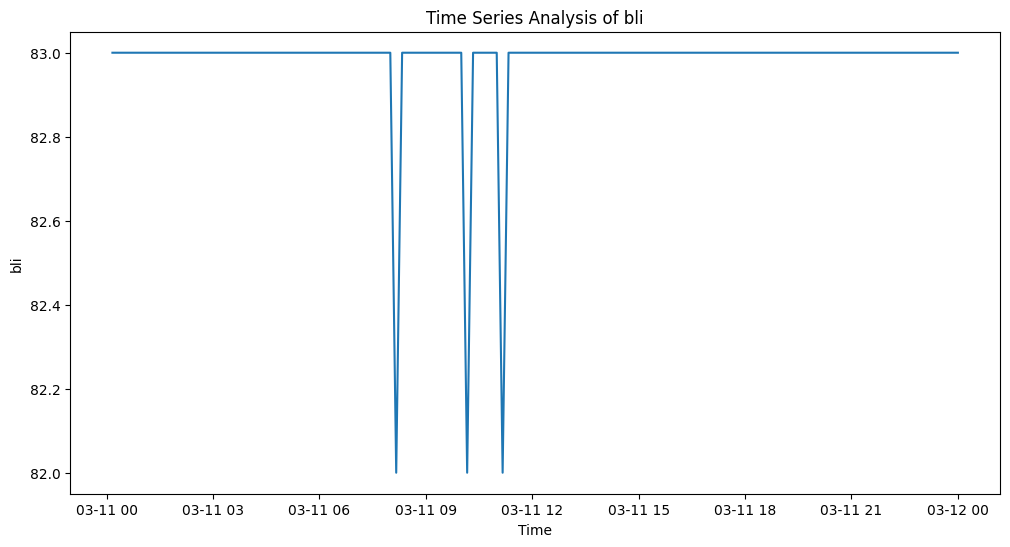

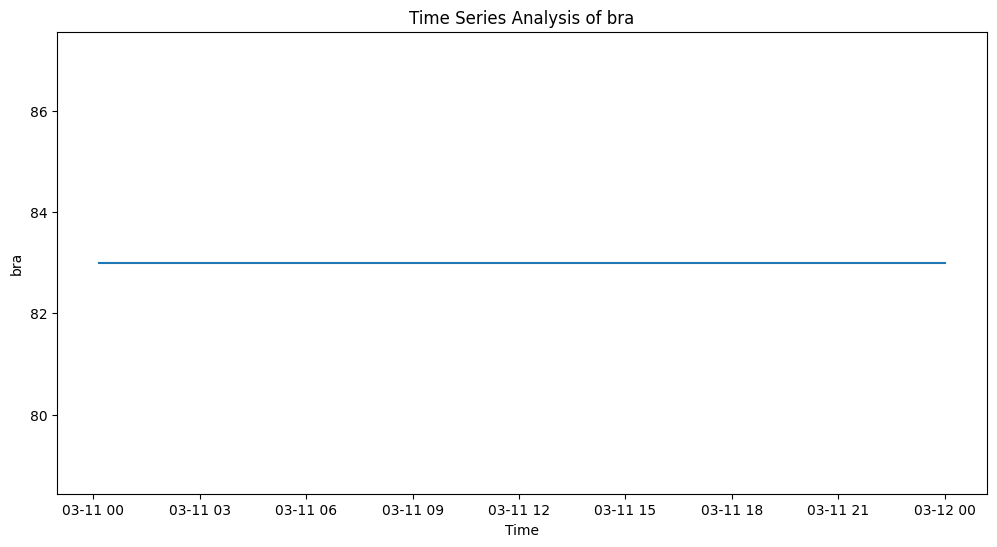

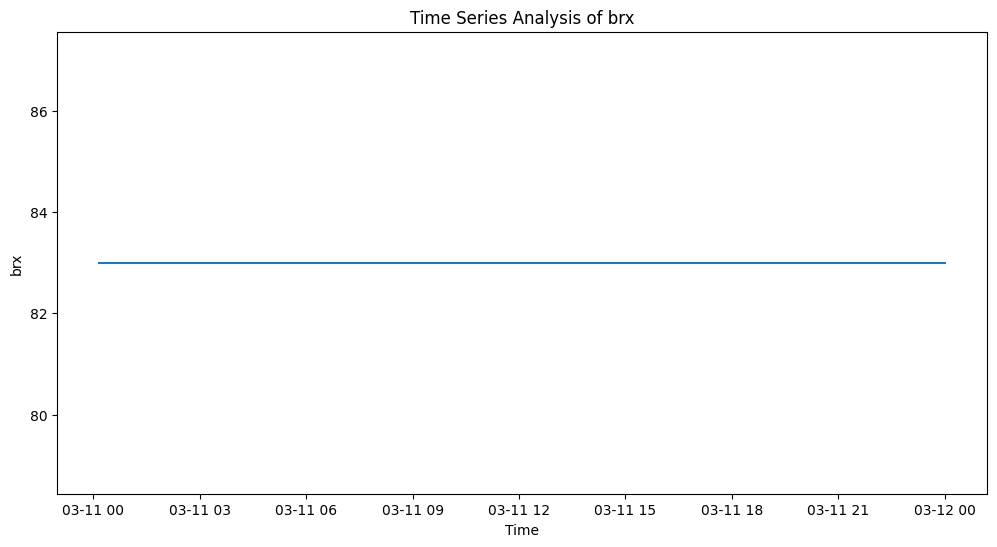

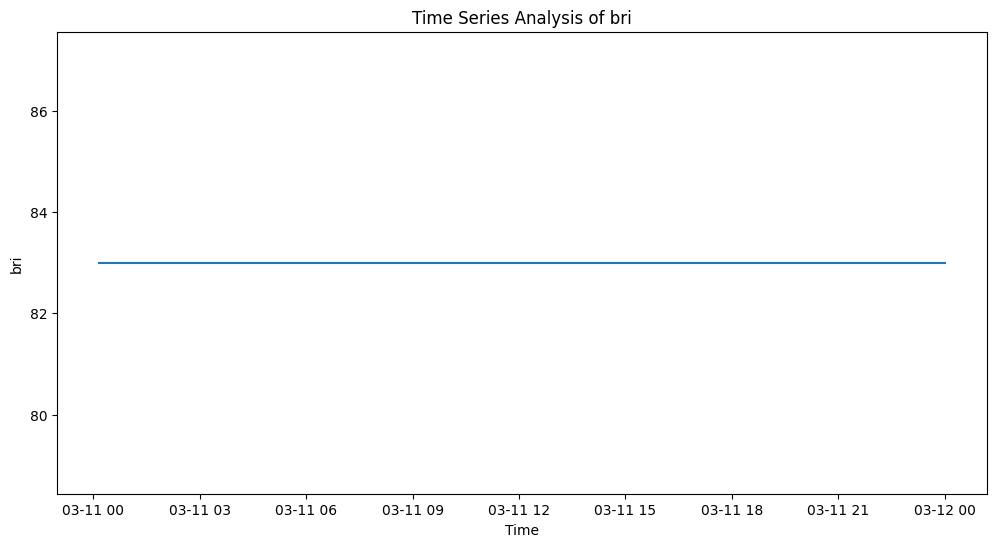

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

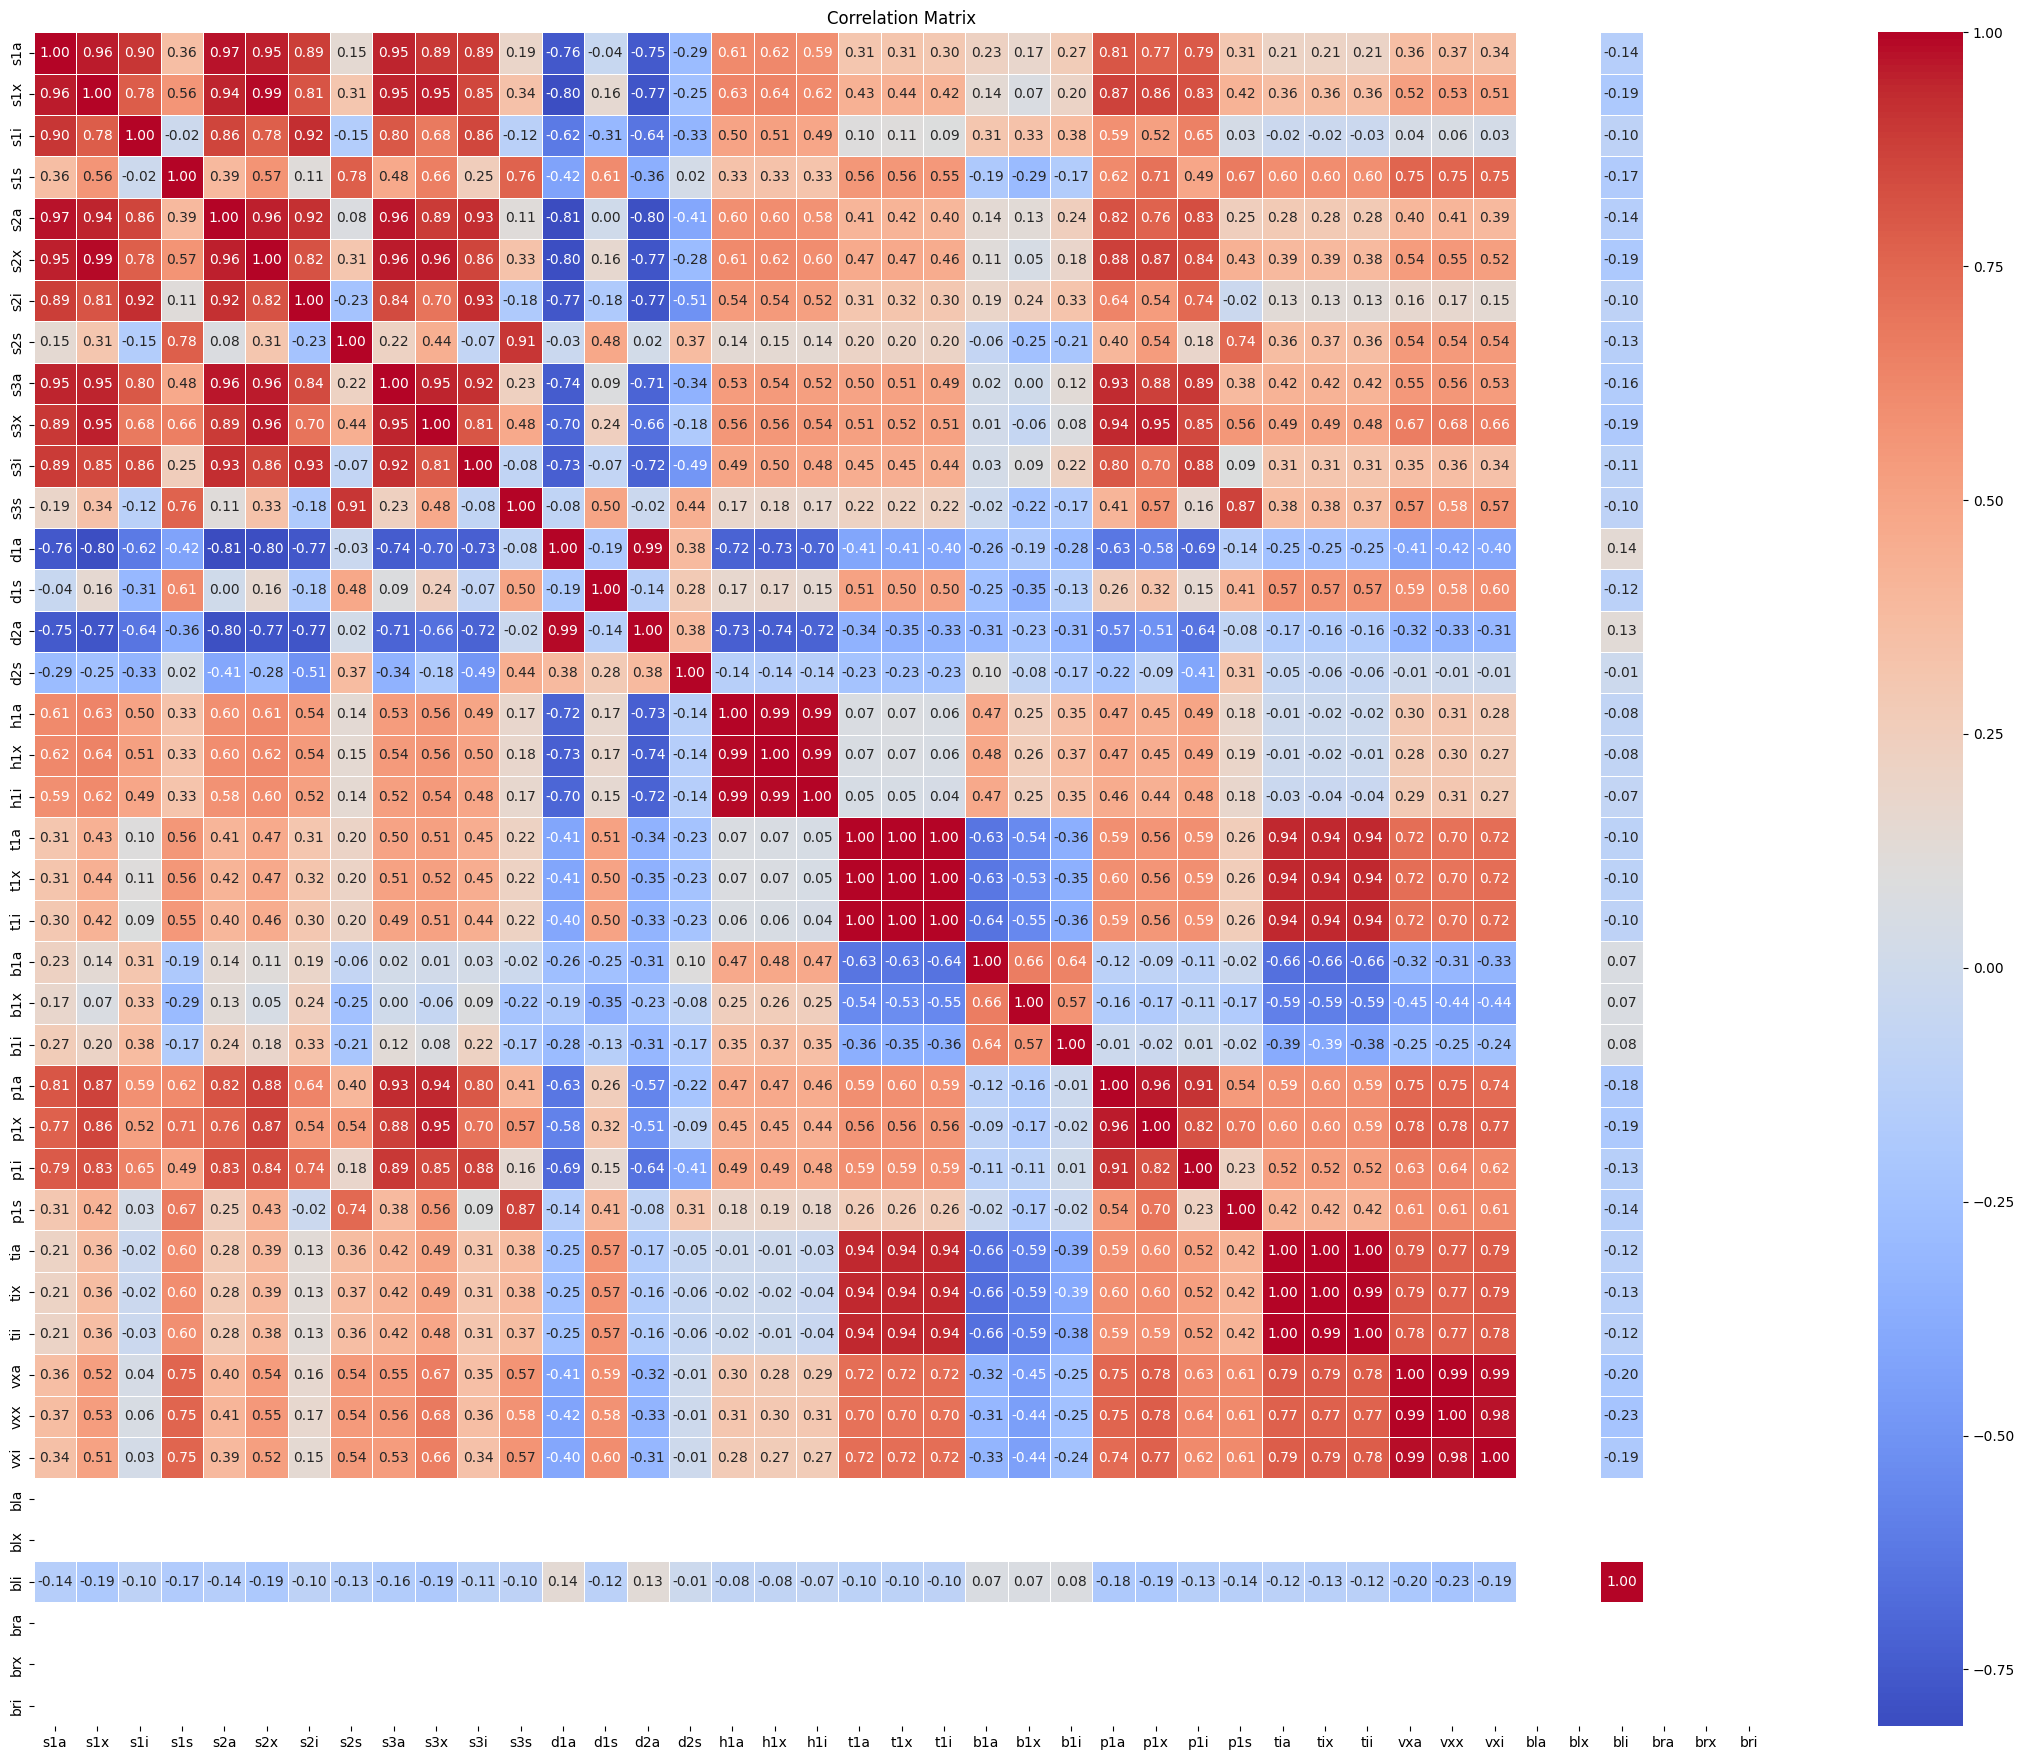

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

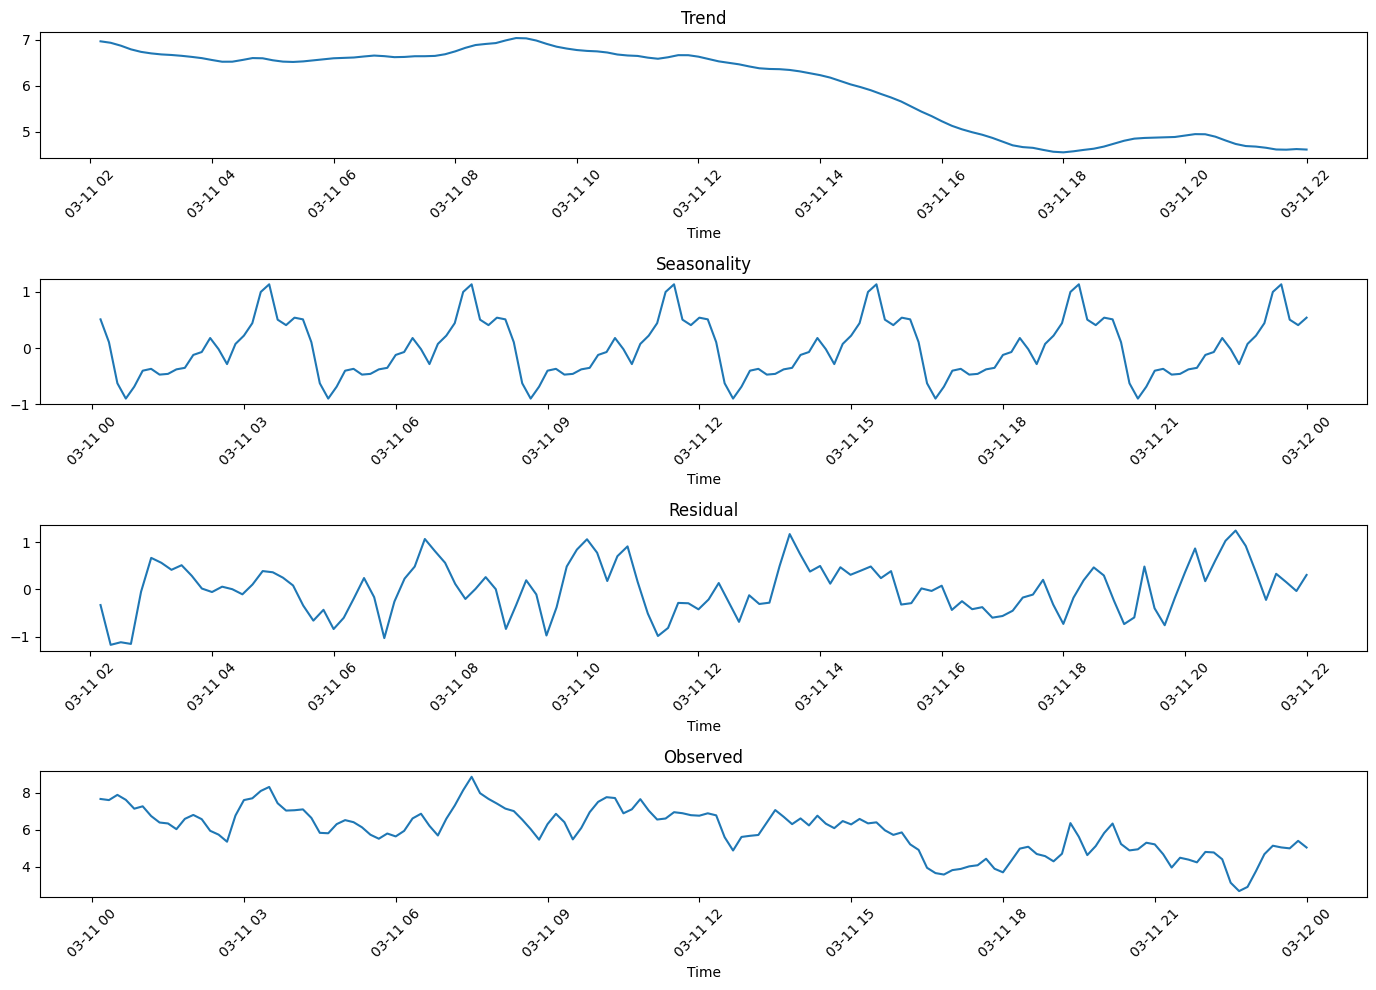

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


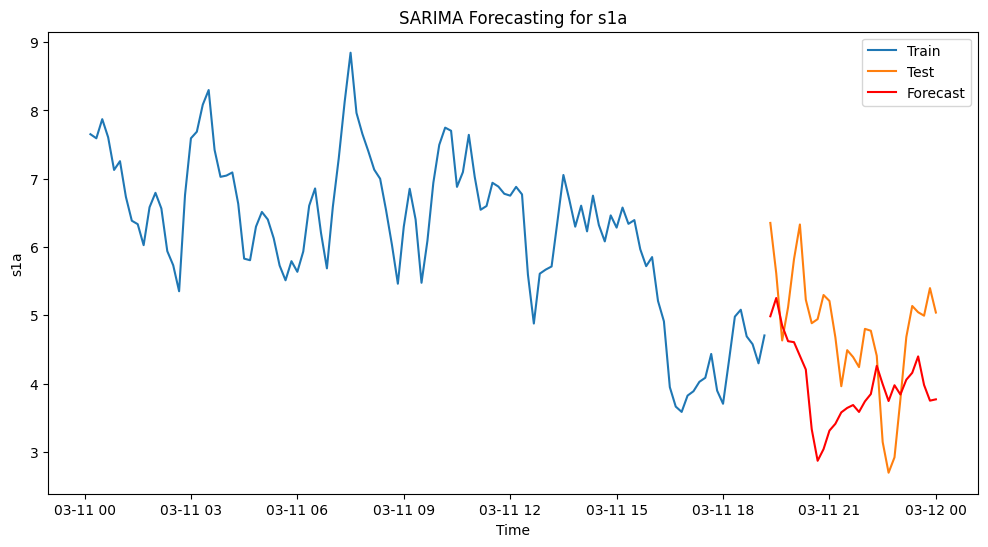

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()